# Default

In [ ]:
# Basic libraries
import numpy as np
import pandas as pd
import json
import re
from collections import Counter
import gc

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, roc_auc_score,
    make_scorer, f1_score, auc, precision_recall_curve
)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

# Natural Language Processing
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.util import ngrams
import spacy
import textstat
from wordcloud import WordCloud

# Statistical analysis
from scipy import stats

# File and system operations
import os
import glob
from google.colab import drive
import joblib

# Time measurement
from time import time

# NLTK downloads
nltk.download('vader_lexicon')

# spaCy model loading
nlp = spacy.load("en_core_web_sm")

# Installation commands (these should be run separately, not imported)
# !pip install catboost textstat nltk pandas scikit-learn
# !python -m spacy download en_core_web_sm

# Jupyter magic command (should be used in Jupyter notebooks)
# Basic libraries
import numpy as np
import pandas as pd
import json
import re
from collections import Counter
import gc

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, roc_auc_score,
    make_scorer, f1_score, auc, precision_recall_curve
)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

# Natural Language Processing
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.util import ngrams
import spacy
import textstat
from wordcloud import WordCloud

# Statistical analysis
from scipy import stats

# File and system operations
import os
import glob
from google.colab import drive
import joblib

# Time measurement
from time import time

# NLTK downloads
nltk.download('vader_lexicon')

# spaCy model loading
nlp = spacy.load("en_core_web_sm")

# Installation commands (these should be run separately, not imported)
# !pip install catboost textstat nltk pandas scikit-learn
# !python -m spacy download en_core_web_sm

# Jupyter magic command (should be used in Jupyter notebooks)
# %%time

In [ ]:
# mount Google drive
drive.mount('/content/drive', force_remount=True)
base_dir = '/content/drive/My Drive/seperate_0731'
file_path = f'{base_dir}/MIRUKU.csv'

Mounted at /content/drive


# EDA

In [ ]:
# reading the CSV file using different encodings
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'utf-16']
for encoding in encodings:
    try:
        df_original = pd.read_csv(file_path, encoding=encoding)
        print(f'Successfully read the file with encoding: {encoding}')
        print(df_original.head())
        break
    except UnicodeDecodeError as e:
        print(f'Failed to read the file with encoding: {encoding}')
        print(f'Error: {e}')

df_original.head()

# examine data distribution
stratify_col = 'sensation'

print("\nOriginal class distribution:")
print(df_original[stratify_col].value_counts())

Successfully read the file with encoding: utf-8
                                            headline  clickbait  sensation  \
0                      £10bn bank bailout in Ireland          0          0   
1  Clearing the air: Positions of Canadian partie...          0          0   
2                   Football: Keïrman goes to Madrid          0          0   
3  Icelandic Landsbanki Íslands earnings on the i...          0          0   
4  Poll shows Prévval with clear lead, but inelig...          0          0   

   sensation_score                                   sensation_reason  \
0             1.10  The text is straightforward, factual, and lack...   
1             0.25  The title is factual and straightforward, lack...   
2             1.32  The text is straightforward and mildly interes...   
3             0.50  The text is factual and straightforward withou...   
4             1.35  The text is primarily informative, providing a...   

                 emotion arousal  arousal_sc

In [ ]:
print(df_original.shape)
print(df_original.columns)
print(df_original.dtypes)

(30424, 9)
Index(['headline', 'clickbait', 'sensation', 'sensation_score',
       'sensation_reason', 'emotion', 'arousal', 'arousal_score',
       'arousal_reason'],
      dtype='object')
headline             object
clickbait             int64
sensation             int64
sensation_score     float64
sensation_reason     object
emotion              object
arousal              object
arousal_score       float64
arousal_reason       object
dtype: object


## Length of headline

count    30424.000000
mean         9.087168
std          2.609171
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         26.000000
Name: headline, dtype: float64


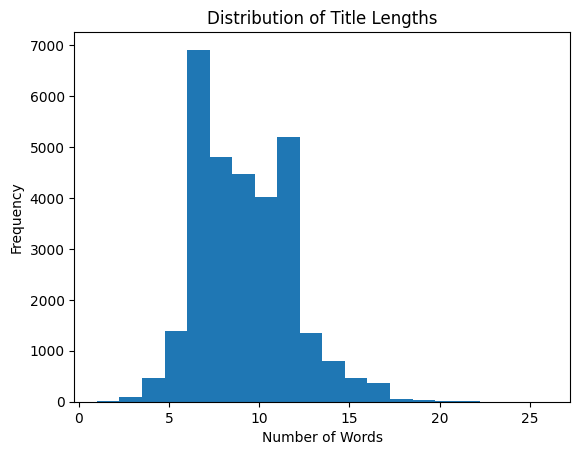

In [ ]:
# calculate title length and plot histogram
title_length = df_original['headline'].str.split().str.len()

print(title_length.describe())

plt.hist(title_length, bins=20)
plt.title('Distribution of Title Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

## Keyword extraction

### with stopword

Top keywords: ['15' '17' '18' '19' '2015' '21' '23' 'about' 'actually' 'after' 'all'
 'an' 'and' 'are' 'as' 'at' 'based' 'be' 'best' 'british' 'by' 'can' 'day'
 'dead' 'dies' 'do' 'ever' 'every' 'everyone' 'favorite' 'first' 'for'
 'from' 'get' 'has' 'have' 'her' 'here' 'his' 'how' 'if' 'in' 'into' 'is'
 'it' 'just' 'killed' 'kills' 'know' 'life' 'like' 'll' 'love' 'make'
 'man' 'more' 'most' 'need' 'new' 'no' 'not' 'obama' 'of' 'on' 'one' 'or'
 'out' 'over' 'people' 'president' 're' 'says' 'should' 'that' 'the'
 'their' 'these' 'things' 'this' 'time' 'times' 'to' 'two' 'uk' 'up' 'us'
 'was' 'we' 'what' 'when' 'which' 'who' 'will' 'with' 'women' 'world'
 'year' 'you' 'your' 'zodiac']


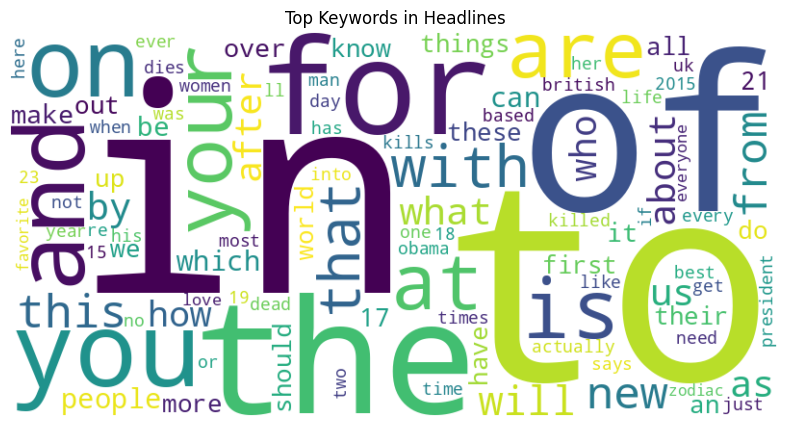

In [ ]:
# using TF-IDF to identify important keywords
vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform(df_original['headline'])
feature_names = vectorizer.get_feature_names_out()
print("Top keywords:", feature_names)

# create a dictionary of words and their TF-IDF scores
tfidf_scores = dict(zip(feature_names, tfidf_matrix.sum(axis=0).tolist()[0]))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords in Headlines')
plt.show()

### w/o stopword

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


Top keywords: ['10' '11' '12' '13' '15' '16' '17' '18' '19' '2015' '21' '22' '23' '24'
 '25' '27' 'actually' 'age' 'american' 'australian' 'based' 'best'
 'british' 'character' 'china' 'christmas' 'court' 'crash' 'day' 'dead'
 'dies' 'disney' 'favorite' 'food' 'found' 'game' 'government' 'guess'
 'halloween' 'harry' 'hilarious' 'home' 'house' 'india' 'iraq' 'killed'
 'kills' 'know' 'life' 'like' 'll' 'look' 'looks' 'love' 'man' 'movie'
 'need' 'new' 'north' 'obama' 'old' 'pakistan' 'party' 'people' 'photos'
 'pictures' 'police' 'president' 'questions' 'real' 'reasons' 'says' 'sex'
 'sign' 'south' 'star' 'tell' 'test' 'thing' 'things' 'time' 'times' 'try'
 'tv' 'tweets' 'uk' 'understand' 'video' 'want' 'watch' 'way' 'ways'
 'week' 'wins' 'woman' 'women' 'world' 'year' 'years' 'zodiac']


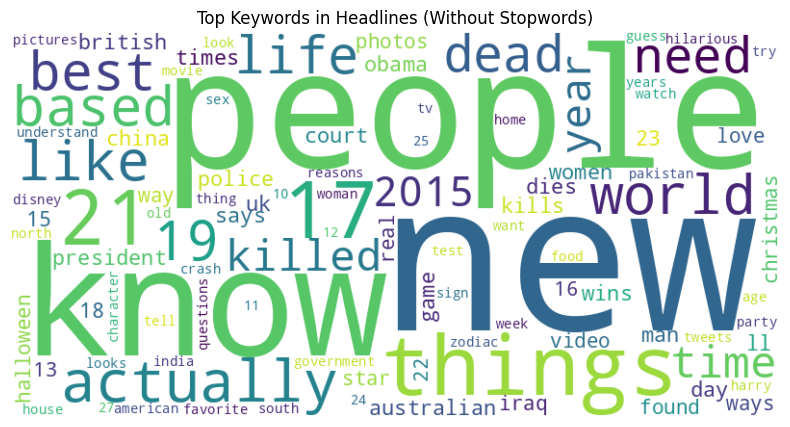

In [ ]:
# load spaCy English model
nlp = spacy.load("en_core_web_sm")

# function to get spaCy stopwords
def get_spacy_stop_words():
    return spacy.lang.en.stop_words.STOP_WORDS

# get spaCy stopwords
spacy_stop_words = get_spacy_stop_words()

# create a custom TF-IDF Vectorizer that removes stopwords
vectorizer = TfidfVectorizer(max_features=100, stop_words=list(spacy_stop_words))
tfidf_matrix = vectorizer.fit_transform(df_original['headline'])

# get the feature names (i.e., the top keywords)
feature_names = vectorizer.get_feature_names_out()
print("Top keywords:", feature_names)

# create a dictionary of words and their TF-IDF scores
tfidf_scores = dict(zip(feature_names, tfidf_matrix.sum(axis=0).tolist()[0]))

# create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)

# display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords in Headlines (Without Stopwords)')
plt.show()

# Threshold

## XGBoost: Calculate threshold by using arousal score and by using PCA on emotions

Optimal Threshold: 0.4457232654094696

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3243
           1       0.98      0.97      0.97      2842

    accuracy                           0.98      6085
   macro avg       0.98      0.98      0.98      6085
weighted avg       0.98      0.98      0.98      6085



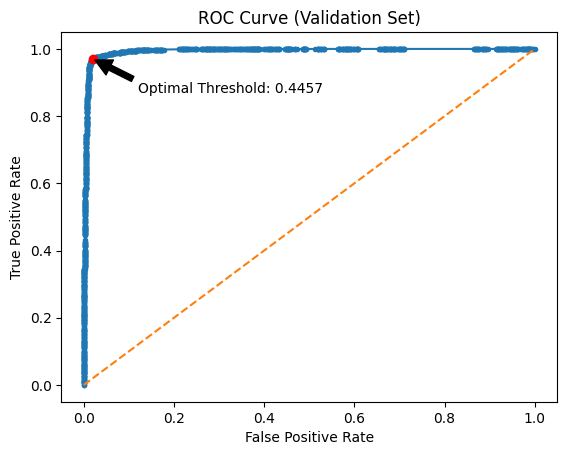


Test Set AUC: 0.9952525365628084

Test Set Results (First 10 rows):
       sensation_score  arousal_score  emotion_pca  true_sensation  \
27421           0.3750          0.353     0.000000               0   
3858            0.3750          0.580     0.675084               0   
29191           0.1250          0.350     0.000000               0   
15484           0.9375          0.680     0.426882               1   
2325            0.7500          0.250     0.000000               0   
4519            0.8750          0.250     0.416768               1   
25322           1.0000          0.455     0.349376               1   
3498            1.0000          0.710     0.733004               1   
22478           0.1875          0.353     0.000000               0   
9644            1.0000          0.921     0.389850               1   

       combined_score  predicted_sensation  
27421        0.005542                    0  
3858         0.000403                    0  
29191        0.000050    

In [ ]:
df_threshold = df_original.copy()

# data preprocessing
df_threshold['arousal'] = df_threshold['arousal'].map({'Yes': 1, 'No': 0})

emotions = ['joy', 'surprise', 'anticipation', 'trust', 'anger', 'fear', 'sadness', 'disgust', 'neutral']
for emotion in emotions:
    df_threshold[emotion] = df_threshold['emotion'].apply(lambda x: 1 if emotion in x else 0)

emotion_data = df_threshold[emotions]

pca = PCA(n_components=1)
principal_component = pca.fit_transform(emotion_data)
df_threshold['emotion_pca'] = principal_component

scaler = MinMaxScaler()
df_threshold[['sensation_score', 'arousal_score', 'emotion_pca']] = scaler.fit_transform(df_threshold[['sensation_score', 'arousal_score', 'emotion_pca']])

# features and target variables
X = df_threshold[['sensation_score', 'arousal_score', 'emotion_pca']]
y = df_threshold['sensation']

# split data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# XGBoost
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# best threshold on validation set
val_predictions = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, val_predictions)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

# final evaluation on test set
test_predictions = model.predict_proba(X_test)[:, 1]
test_predictions_binary = (test_predictions >= optimal_threshold).astype(int)

print("\nTest Set Evaluation:")
print(classification_report(y_test, test_predictions_binary))

# ROC curve with best threshold
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation Set)')

optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]
plt.plot(optimal_fpr, optimal_tpr, 'ro')
plt.annotate(f'Optimal Threshold: {optimal_threshold:.4f}',
             xy=(optimal_fpr, optimal_tpr),
             xytext=(optimal_fpr + 0.1, optimal_tpr - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

# AUC of test set
test_auc = roc_auc_score(y_test, test_predictions)
print(f"\nTest Set AUC: {test_auc}")

# apply combined scores on the test set
df_test = pd.DataFrame(X_test, columns=['sensation_score', 'arousal_score', 'emotion_pca'])
df_test['true_sensation'] = y_test
df_test['combined_score'] = test_predictions
df_test['predicted_sensation'] = test_predictions_binary

print("\nTest Set Results (First 10 rows):")
print(df_test.head(10))

# save best XGBoost threshold and model
joblib.dump(optimal_threshold, f'{base_dir}/XGoptimal_threshold.joblib')
model.save_model(f'{base_dir}/xgboost_threshold_model.json')

## ADABoost: Calculate threshold by using arousal score and by using PCA on emotions

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Optimal Threshold: 0.5065828543375741

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3243
           1       0.98      0.97      0.97      2842

    accuracy                           0.98      6085
   macro avg       0.98      0.98      0.98      6085
weighted avg       0.98      0.98      0.98      6085



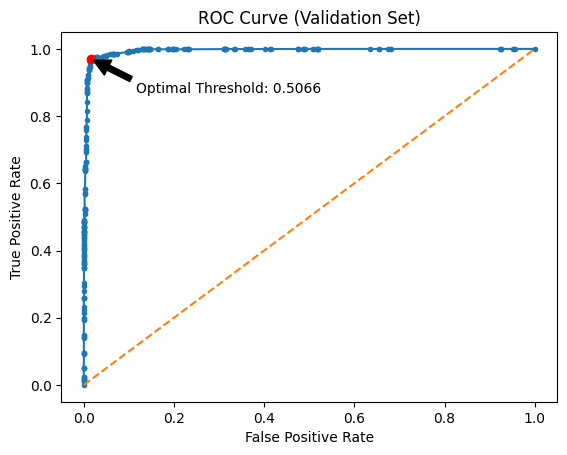


Test Set AUC: 0.9955318150737917

Test Set Results (First 10 rows):
       sensation_score  arousal_score   emotion_pca  true_sensation  \
27421           0.3750          0.353  3.885781e-16               0   
3858            0.3750          0.580  6.750835e-01               0   
29191           0.1250          0.350  3.885781e-16               0   
15484           0.9375          0.680  4.268818e-01               1   
2325            0.7500          0.250  3.885781e-16               0   
4519            0.8750          0.250  4.167683e-01               1   
25322           1.0000          0.455  3.493763e-01               1   
3498            1.0000          0.710  7.330043e-01               1   
22478           0.1875          0.353  3.885781e-16               0   
9644            1.0000          0.921  3.898502e-01               1   

       combined_score  predicted_sensation  
27421        0.467766                    0  
3858         0.467225                    0  
29191        0

['/content/drive/My Drive/seperate_0731/adaboost_model.joblib']

In [ ]:
df_threshold = df_original.copy()

# data preprocessing
df_threshold['arousal'] = df_threshold['arousal'].map({'Yes': 1, 'No': 0})

emotions = ['joy', 'surprise', 'anticipation', 'trust', 'anger', 'fear', 'sadness', 'disgust', 'neutral']
for emotion in emotions:
    df_threshold[emotion] = df_threshold['emotion'].apply(lambda x: 1 if emotion in x else 0)

emotion_data = df_threshold[emotions]

pca = PCA(n_components=1)
principal_component = pca.fit_transform(emotion_data)
df_threshold['emotion_pca'] = principal_component

scaler = MinMaxScaler()
df_threshold[['sensation_score', 'arousal_score', 'emotion_pca']] = scaler.fit_transform(df_threshold[['sensation_score', 'arousal_score', 'emotion_pca']])

# features and target variables
X = df_threshold[['sensation_score', 'arousal_score', 'emotion_pca']]
y = df_threshold['sensation']

# data split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Adaboost
base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# best threshold on validation set
val_predictions = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, val_predictions)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

# final evaluation on test set
test_predictions = model.predict_proba(X_test)[:, 1]
test_predictions_binary = (test_predictions >= optimal_threshold).astype(int)

print("\nTest Set Evaluation:")
print(classification_report(y_test, test_predictions_binary))

# ROC curve with best threshold
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation Set)')

optimal_fpr, optimal_tpr = fpr[optimal_idx], tpr[optimal_idx]
plt.plot(optimal_fpr, optimal_tpr, 'ro')
plt.annotate(f'Optimal Threshold: {optimal_threshold:.4f}',
             xy=(optimal_fpr, optimal_tpr),
             xytext=(optimal_fpr + 0.1, optimal_tpr - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

# AUC of test set
test_auc = roc_auc_score(y_test, test_predictions)
print(f"\nTest Set AUC: {test_auc}")

# apply combined scores on the test set
df_test = pd.DataFrame(X_test, columns=['sensation_score', 'arousal_score', 'emotion_pca'])
df_test['true_sensation'] = y_test
df_test['combined_score'] = test_predictions
df_test['predicted_sensation'] = test_predictions_binary

print("\nTest Set Results (First 10 rows):")
print(df_test.head(10))

# save best XGBoost threshold and model
joblib.dump(optimal_threshold, f'{base_dir}/ADAoptimal_threshold.joblib')
joblib.dump(model, f'{base_dir}/adaboost_model.joblib')

## CATBoost: Calculate threshold by using arousal score and by using PCA on emotions

Optimal Threshold: 0.47474399083407737

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3243
           1       0.98      0.97      0.98      2842

    accuracy                           0.98      6085
   macro avg       0.98      0.98      0.98      6085
weighted avg       0.98      0.98      0.98      6085



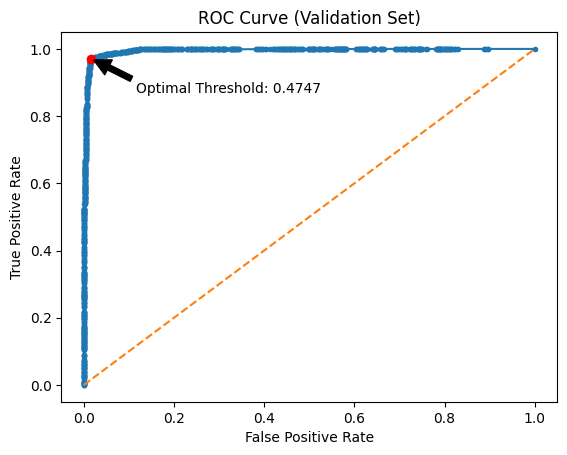


Test Set AUC: 0.9957597731746373

Test Set Results (First 10 rows):
       sensation_score  arousal_score   emotion_pca  true_sensation  \
27421           0.3750          0.353  6.106227e-16               0   
3858            0.3750          0.580  6.750835e-01               0   
29191           0.1250          0.350  6.106227e-16               0   
15484           0.9375          0.680  4.268818e-01               1   
2325            0.7500          0.250  6.106227e-16               0   
4519            0.8750          0.250  4.167683e-01               1   
25322           1.0000          0.455  3.493763e-01               1   
3498            1.0000          0.710  7.330043e-01               1   
22478           0.1875          0.353  6.106227e-16               0   
9644            1.0000          0.921  3.898502e-01               1   

       combined_score  predicted_sensation  
27421        0.002866                    0  
3858         0.005327                    0  
29191        0

In [ ]:
df_threshold = df_original.copy()

# data preprocessing
df_threshold['arousal'] = df_threshold['arousal'].map({'Yes': 1, 'No': 0})

emotions = ['joy', 'surprise', 'anticipation', 'trust', 'anger', 'fear', 'sadness', 'disgust', 'neutral']
for emotion in emotions:
    df_threshold[emotion] = df_threshold['emotion'].apply(lambda x: 1 if emotion in x else 0)

emotion_data = df_threshold[emotions]

pca = PCA(n_components=1)
principal_component = pca.fit_transform(emotion_data)
df_threshold['emotion_pca'] = principal_component

scaler = MinMaxScaler()
df_threshold[['sensation_score', 'arousal_score', 'emotion_pca']] = scaler.fit_transform(df_threshold[['sensation_score', 'arousal_score', 'emotion_pca']])

# features and target variables
X = df_threshold[['sensation_score', 'arousal_score', 'emotion_pca']]
y = df_threshold['sensation']

# data split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# CatBoost
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=False)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=20, verbose=False)

# best threshold on validation set
val_predictions = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, val_predictions)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

# final evaluation on test set
test_predictions = model.predict_proba(X_test)[:, 1]
test_predictions_binary = (test_predictions >= optimal_threshold).astype(int)

print("\nTest Set Evaluation:")
print(classification_report(y_test, test_predictions_binary))

# ROC curve with best threshold
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation Set)')

optimal_fpr, optimal_tpr = fpr[optimal_idx], tpr[optimal_idx]
plt.plot(optimal_fpr, optimal_tpr, 'ro')
plt.annotate(f'Optimal Threshold: {optimal_threshold:.4f}',
             xy=(optimal_fpr, optimal_tpr),
             xytext=(optimal_fpr + 0.1, optimal_tpr - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

# AUC of test set
test_auc = roc_auc_score(y_test, test_predictions)
print(f"\nTest Set AUC: {test_auc}")

# apply combined scores on the test set
df_test = pd.DataFrame(X_test, columns=['sensation_score', 'arousal_score', 'emotion_pca'])
df_test['true_sensation'] = y_test
df_test['combined_score'] = test_predictions
df_test['predicted_sensation'] = test_predictions_binary

print("\nTest Set Results (First 10 rows):")
print(df_test.head(10))

# save best CatBoost threshold and model
joblib.dump(optimal_threshold, f'{base_dir}/CAToptimal_threshold.joblib')
model.save_model(f'{base_dir}/catboost_model.cbm')

# print feature importance
feature_importance = model.get_feature_importance()
feature_names = X.columns
for score, name in sorted(zip(feature_importance, feature_names), reverse=True):
    print(f"{name}: {score}")

# Features

## Number of words in the headline

In [ ]:
# dataframe number of words
df_now = df_original.copy()

# calculate words in headlines
df_now['Number of Words'] = df_now['headline'].apply(lambda x: len(str(x).split()))

print(df_now.head())

min_words = df_now['Number of Words'].min()
max_words = df_now['Number of Words'].max()
avg_words = df_now['Number of Words'].mean()

print(f"min number of words: {min_words}")
print(f"max number of words: {max_words}")
print(f"average words: {avg_words:.2f}")

# calculate the number of stop words for sensation and non-sensation categories, grouped by word count
sensation_counts = df_now[df_now['sensation'] == 1]['Number of Words'].value_counts().sort_index()
non_sensation_counts = df_now[df_now['sensation'] == 0]['Number of Words'].value_counts().sort_index()

# calculate the total number of stop words in each category
total_sensation = sensation_counts.sum()
total_non_sensation = non_sensation_counts.sum()

print("Sensation - Number of Words Counts:")
print(sensation_counts)
print(f"Total Sensation Count: {total_sensation}")

print("\nNon-Sensation - Number of Words Counts:")
print(non_sensation_counts)
print(f"Total Non-Sensation Count: {total_non_sensation}")

                                            headline  clickbait  sensation  \
0                      £10bn bank bailout in Ireland          0          0   
1  Clearing the air: Positions of Canadian partie...          0          0   
2                   Football: Keïrman goes to Madrid          0          0   
3  Icelandic Landsbanki Íslands earnings on the i...          0          0   
4  Poll shows Prévval with clear lead, but inelig...          0          0   

   sensation_score                                   sensation_reason  \
0             1.10  The text is straightforward, factual, and lack...   
1             0.25  The title is factual and straightforward, lack...   
2             1.32  The text is straightforward and mildly interes...   
3             0.50  The text is factual and straightforward withou...   
4             1.35  The text is primarily informative, providing a...   

                 emotion arousal  arousal_score  \
0  anger, fear, sadness      Yes         

<ipython-input-9-b7f2cdf756c0>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_now, x='Number of Words', hue='sensation', shade=True)


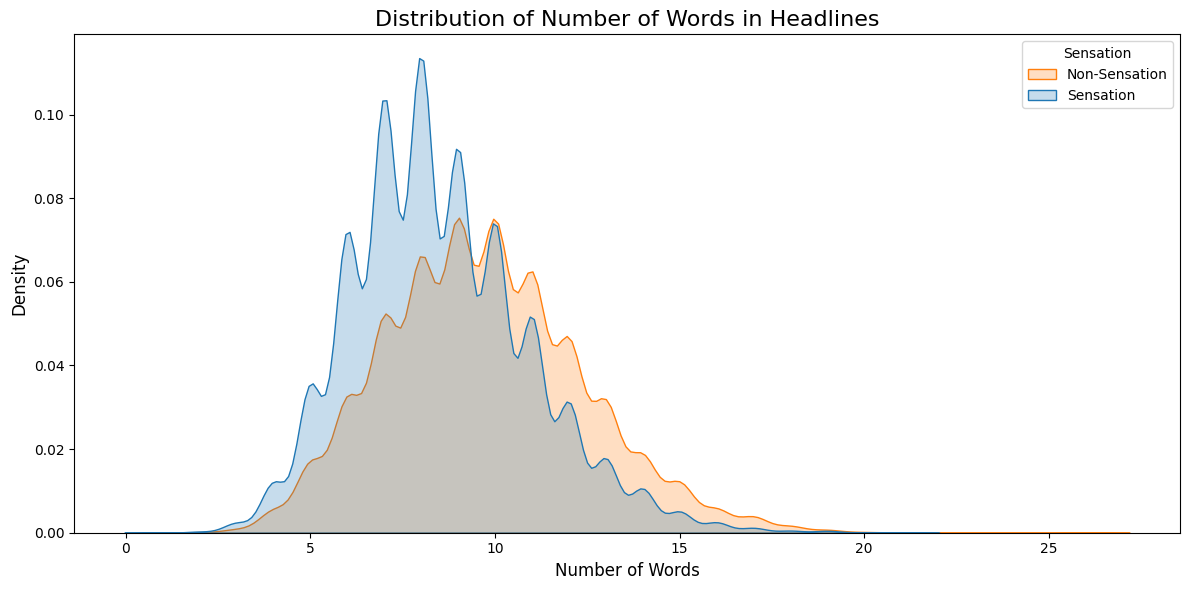

Descriptive Statistics for Number of Words:
             count      mean       std  min  25%   50%   75%   max
sensation                                                         
0          16117.0  8.533102  2.397509  1.0  7.0   8.0  10.0  21.0
1          14307.0  9.711330  2.695661  2.0  8.0  10.0  11.0  26.0

t-test results for Number of Words:
t-statistic: 40.350541973051406
p-value: 0.0


In [ ]:
# kernel density estimation plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_now, x='Number of Words', hue='sensation', shade=True)
plt.title('Distribution of Number of Words in Headlines', fontsize=16)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Sensation', labels=['Non-Sensation', 'Sensation'])
plt.tight_layout()
plt.show()

# descriptive statistics
desc_stats = df_now.groupby('sensation')['Number of Words'].describe()
print("Descriptive Statistics for Number of Words:")
print(desc_stats)

# perform t-test
sensation_words = df_now[df_now['sensation'] == 1]['Number of Words']
non_sensation_words = df_now[df_now['sensation'] == 0]['Number of Words']
t_stat, p_value = stats.ttest_ind(sensation_words, non_sensation_words)

print(f"\nt-test results for Number of Words:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

In [ ]:
# save .csv in utf-8
output_path = f'{base_dir}/df_now.csv'
df_now.to_csv(output_path, index=False, encoding='utf-8')

### XGBoost

In [ ]:
base_dir = '/content/drive/My Drive/seperate_0731'

# # load threshold
# optimal_threshold = joblib.load(f'{base_dir}/XGoptimal_threshold.joblib')

# remove target variables and headlines columns
def prepare_data(df_now):
    X = df_now.drop(['headline', 'clickbait', 'sensation_score',
                   'sensation_reason', 'emotion', 'arousal', 'arousal_score',
                   'arousal_reason', 'sensation'], axis=1)
    y = df_now['sensation']

    # split dataset
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # ensure all data in numeric
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    # preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    # fit and transform on train set
    X_train_processed = pipeline.fit_transform(X_train)

    # apply SMOTE on train set
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

    # transform on validation set
    X_val_processed = pipeline.transform(X_val)

    return X_train_resampled, X_val_processed, y_train_resampled, y_val, pipeline

CPU times: user 32 µs, sys: 11 µs, total: 43 µs
Wall time: 45.5 µs


In [ ]:
# Prepare data
X_train, X_val, y_train, y_val, preprocessor = prepare_data(df_now)

# Create XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist_xgb = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

# Create K-Fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_xg = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

# Fit on preprocessed training data
random_search_xg.fit(X_train, y_train)

print("Best parameters:", random_search_xg.best_params_)
print("Best cross-validation score:", random_search_xg.best_score_)

# Use best parameters to create new model
best_params = random_search_xg.best_params_
best_model = xgb.XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric='logloss',
    early_stopping_rounds=50  # Add early stopping here
)

# Train the model with early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# Use best model for prediction on validation set
y_val_pred = best_model.predict(X_val)

# Print classification report
print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:17:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best cross-validation score: 0.606811546536494

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.55      0.59      3224
           1       0.56      0.66      0.61      2861

    accuracy                           0.60      6085
   macro avg       0.60      0.60      0.60      6085
weighted avg       0.61      0.60      0.60      6085



### ROC AUC

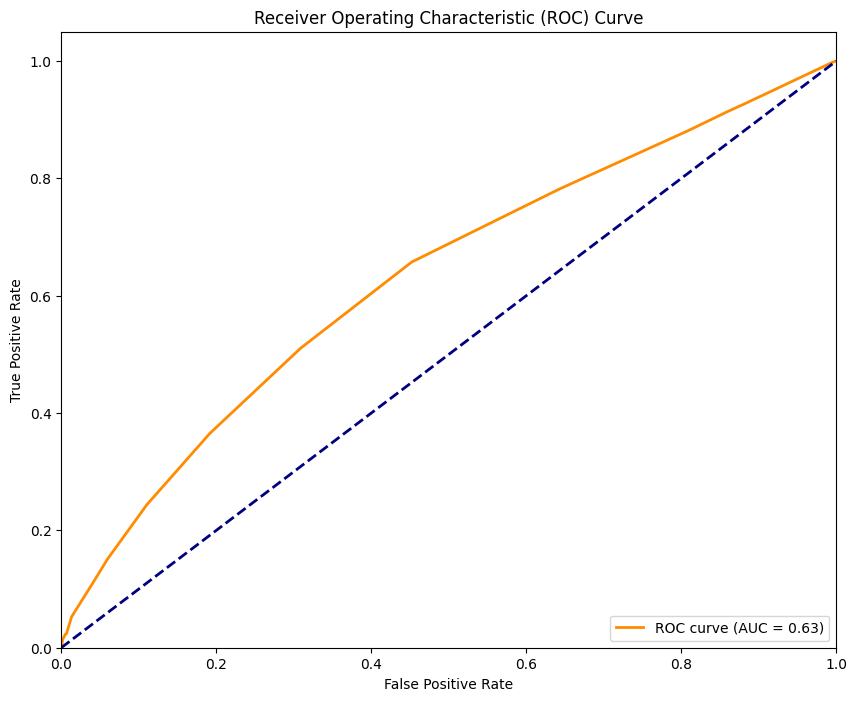

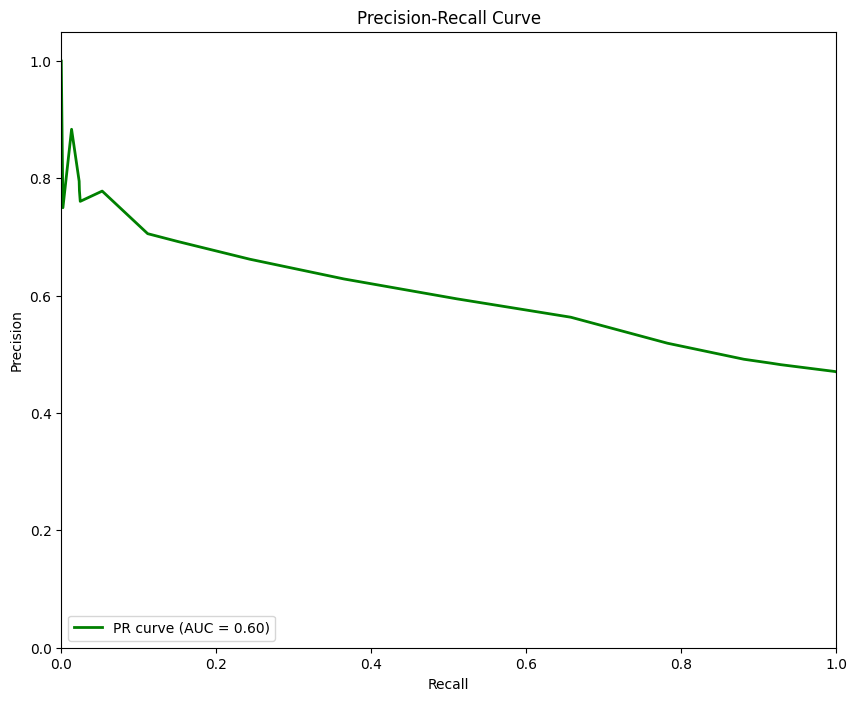

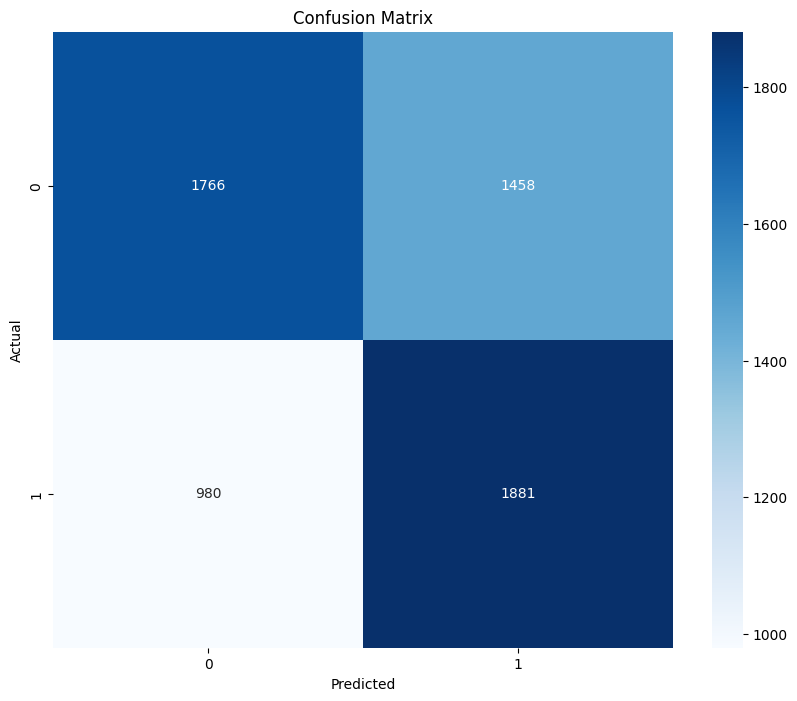

In [ ]:
# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_val, best_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, best_model.predict_proba(X_val)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# !pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 37.8 MB/s eta 0:00:00


## Number of stop words in the headlines

In [ ]:
# calculate stopwords function
def count_stopwords(text):
    doc = nlp(text)
    return sum(1 for token in doc if token.is_stop)

# copy of Number of stop words in the headlines
df_nostop = df_original.copy()
df_nostop['Number of stop words'] = df_nostop['headline'].apply(count_stopwords)

print(df_nostop.head())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 102.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
                                            headline  clickbait  sensation  \
0                      £10bn bank bailout in Ireland          0          0   
1  Clearing the air: Positions of Canadian partie...          0          0   
2                   Football: Keïrman goes to Madrid          0          0   
3  Icelandic Landsbanki Íslands earnings on the i...          0          0   
4  Poll shows Prévval with clear lead, but inelig...          0          0   

   sensation_score                                   sensation_reason  \
0             1.10  The text is straight

In [ ]:
# calculate the number of stop words for sensation and non-sensation categories, grouped by word count
sensation_stopwords_counts = df_nostop[df_nostop['sensation'] == 1]['Number of stop words'].value_counts().sort_index()
non_sensation_stopwords_counts = df_nostop[df_nostop['sensation'] == 0]['Number of stop words'].value_counts().sort_index()

# calculate the total number of stop words in each category
total_sensation_stopwords = sensation_stopwords_counts.sum()
total_non_sensation_stopwords = non_sensation_stopwords_counts.sum()

# print the results grouped by word count
print("Sensation - Number of Stop Words by Word Count:")
print(sensation_stopwords_counts)

print("\nNon-Sensation - Number of Stop Words by Word Count:")
print(non_sensation_stopwords_counts)

# print the total for each category
print(f"\nTotal Stop Words in Sensation Headlines: {total_sensation_stopwords}")
print(f"Total Stop Words in Non-Sensation Headlines: {total_non_sensation_stopwords}")


Sensation - Number of Stop Words by Word Count:
Number of stop words
0      466
1     1751
2     2262
3     2452
4     2192
5     1851
6     1369
7      936
8      529
9      280
10     142
11      45
12      22
13       6
14       4
Name: count, dtype: int64

Non-Sensation - Number of Stop Words by Word Count:
Number of stop words
0     1286
1     3259
2     3635
3     2692
4     2019
5     1448
6      875
7      493
8      234
9      102
10      48
11      14
12       4
13       5
14       3
Name: count, dtype: int64

Total Stop Words in Sensation Headlines: 14307
Total Stop Words in Non-Sensation Headlines: 16117


<ipython-input-7-fd79f8a338a7>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_nostop, x='Number of stop words', hue='sensation', shade=True)


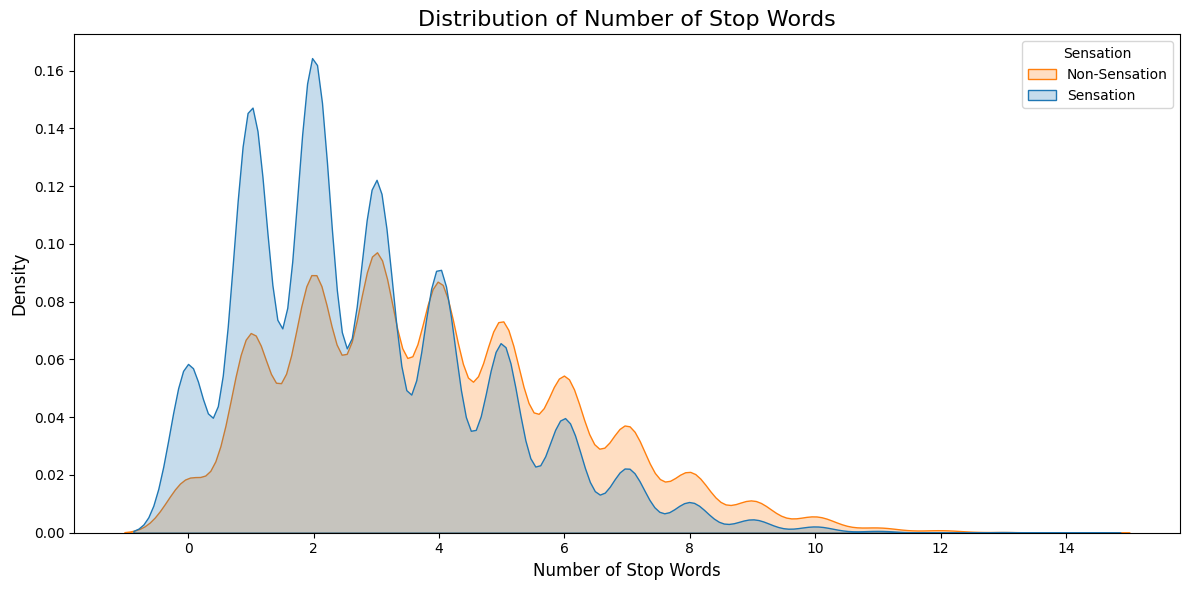

Descriptive Statistics for Number of Stop Words:
             count      mean       std  min  25%  50%  75%   max
sensation                                                       
0          16117.0  2.866600  2.015841  0.0  1.0  2.0  4.0  14.0
1          14307.0  3.878172  2.294674  0.0  2.0  4.0  5.0  14.0

T-Test Results for Number of Stop Words:
t-statistic: 40.9326308389984
p-value: 0.0


In [ ]:
# Kernel density estimation plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_nostop, x='Number of stop words', hue='sensation', shade=True)
plt.title('Distribution of Number of Stop Words', fontsize=16)
plt.xlabel('Number of Stop Words', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Sensation', labels=['Non-Sensation', 'Sensation'])
plt.tight_layout()
plt.show()

# Descriptive statistics
desc_stats = df_nostop.groupby('sensation')['Number of stop words'].describe()
print("Descriptive Statistics for Number of Stop Words:")
print(desc_stats)

# T test
sensation_stopwords = df_nostop[df_nostop['sensation'] == 1]['Number of stop words']
non_sensation_stopwords = df_nostop[df_nostop['sensation'] == 0]['Number of stop words']

t_stat, p_value = stats.ttest_ind(sensation_stopwords, non_sensation_stopwords)

print("\nT-Test Results for Number of Stop Words:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

In [ ]:
# save .csv in utf-8
output_path = f'{base_dir}/df_nostop.csv'
df_nostop.to_csv(output_path, index=False, encoding='utf-8')

### XGBoost

In [ ]:
base_dir = '/content/drive/My Drive/seperate_0731'

# remove target variables and headlines columns
def prepare_data(df_nostop):
    X = df_nostop.drop(['headline', 'clickbait', 'sensation_score',
                   'sensation_reason', 'emotion', 'arousal', 'arousal_score',
                   'arousal_reason', 'sensation'], axis=1)
    y = df_nostop['sensation']

    # # split dataset
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # ensure all data in numeric
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    # preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    # fit and transform on train set
    X_train_processed = pipeline.fit_transform(X_train)

    # apply SMOTE on train set
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

    # transform on validation set
    X_val_processed = pipeline.transform(X_val)

    return X_train_resampled, X_val_processed, y_train_resampled, y_val, pipeline

CPU times: user 38 µs, sys: 1 µs, total: 39 µs
Wall time: 42.2 µs


In [ ]:
# prepare data
X_train, X_val, y_train, y_val, preprocessor = prepare_data(df_nostop)

# create XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist_xgb = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

# create K-Fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_xg = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

# fit on preprocessed training data
random_search_xg.fit(X_train, y_train)

print("Best parameters:", random_search_xg.best_params_)
print("Best cross-validation score:", random_search_xg.best_score_)

# use best parameters to create new model
best_params = random_search_xg.best_params_
best_model = xgb.XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric='logloss',
    early_stopping_rounds=50  # Add early stopping here
)

# train the model with early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# use best model for prediction on validation set
y_val_pred = best_model.predict(X_val)

# print classification report
print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:21:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best cross-validation score: 0.6304409368430474


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:21:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.51      0.57      3224
           1       0.55      0.68      0.61      2861

    accuracy                           0.59      6085
   macro avg       0.60      0.60      0.59      6085
weighted avg       0.60      0.59      0.59      6085



### ROC AUC

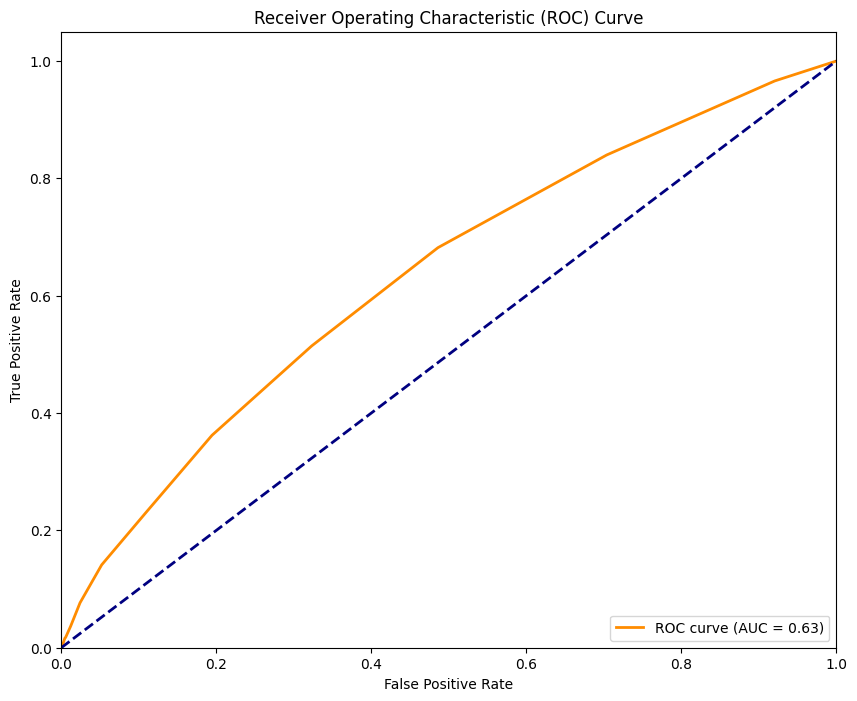

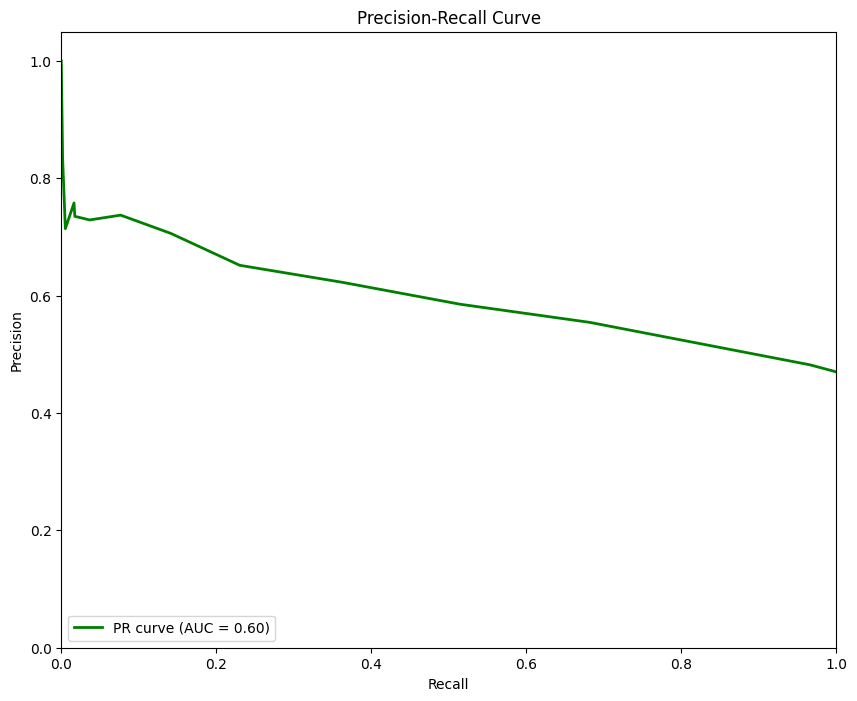

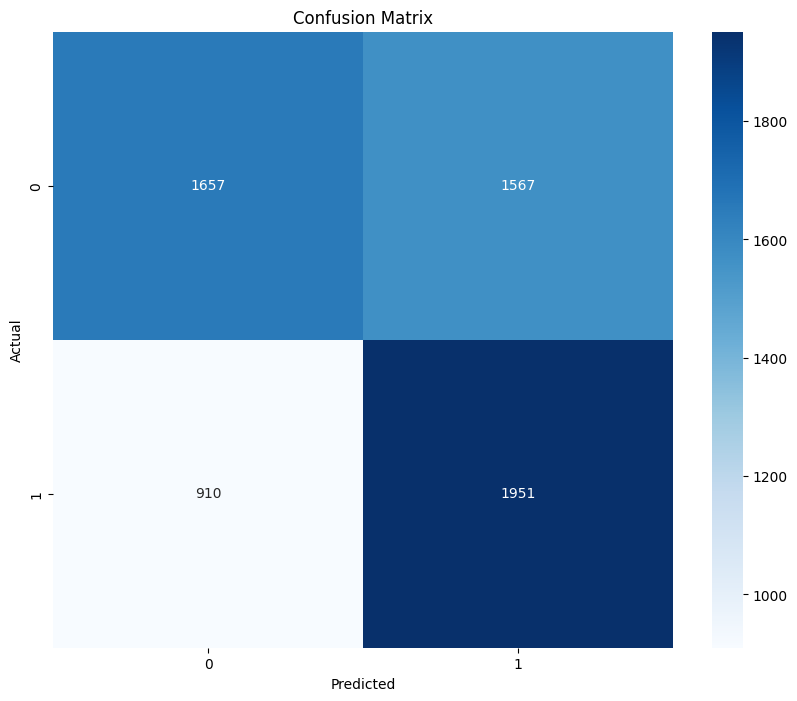

In [ ]:
# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_val, best_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, best_model.predict_proba(X_val)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## The ratio of the number of stop words to the number of content words

In [ ]:
# dataframe of ratio of the number of stop words to the number of content words
df_ratiostopwords = df_original.copy()

# function of calculating stopwrods and content words
def calculate_stopword_ratio(headline):
    doc = nlp(headline)
    stop_words = [token.text for token in doc if token.is_stop]
    content_words = [token.text for token in doc if not token.is_stop and token.is_alpha]   # consider only alphabetic content words
    if len(content_words) == 0:  # prevent division by zero error
        return 0
    return len(stop_words) / len(content_words)

# calculate the ratio of stop words to content words and store it in a new column
df_ratiostopwords['ratio_stopwords'] = df_ratiostopwords['headline'].apply(calculate_stopword_ratio)

print(df_ratiostopwords[['headline', 'ratio_stopwords']].head())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 104.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
                                            headline  ratio_stopwords
0                      £10bn bank bailout in Ireland         0.333333
1  Clearing the air: Positions of Canadian partie...         0.333333
2                   Football: Keïrman goes to Madrid         0.250000
3  Icelandic Landsbanki Íslands earnings on the i...         0.400000
4  Poll shows Prévval with clear lead, but inelig...         0.500000


<ipython-input-9-3bdcf876575c>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_ratiostopwords, x='ratio_stopwords', hue='sensation', shade=True)


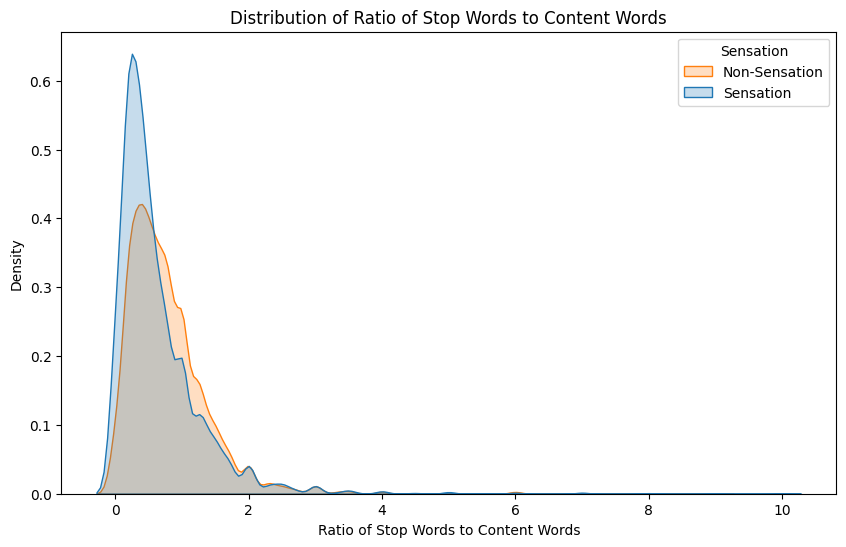

Descriptive Statistics:
             count      mean       std  min       25%       50%  75%   max
sensation                                                                 
0          16117.0  0.627735  0.654308  0.0  0.200000  0.428571  0.8  10.0
1          14307.0  0.771962  0.617822  0.0  0.333333  0.666667  1.0   9.0

t-test results for Ratio of Stop Words to Content Words:
t-statistic: 19.698552527035524
p-value: 7.615483437202693e-86


In [ ]:
# kernel density estimation plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_ratiostopwords, x='ratio_stopwords', hue='sensation', shade=True)
plt.title('Distribution of Ratio of Stop Words to Content Words')
plt.xlabel('Ratio of Stop Words to Content Words')
plt.ylabel('Density')
plt.legend(title='Sensation', labels=['Non-Sensation', 'Sensation'])
plt.show()

# descriptive statistics
desc_stats = df_ratiostopwords.groupby('sensation')['ratio_stopwords'].describe()
print("Descriptive Statistics:")
print(desc_stats)

# perform t-test
sensation_ratios = df_ratiostopwords[df_ratiostopwords['sensation'] == 1]['ratio_stopwords']
non_sensation_ratios = df_ratiostopwords[df_ratiostopwords['sensation'] == 0]['ratio_stopwords']
t_stat, p_value = stats.ttest_ind(sensation_ratios, non_sensation_ratios)

print(f"\nt-test results for Ratio of Stop Words to Content Words:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

In [ ]:
# save .csv in utf-8
output_path = f'{base_dir}/df_ratiostopwords.csv'
df_ratiostopwords.to_csv(output_path, index=False, encoding='utf-8')

### XGBoost

In [ ]:
%%time
base_dir = '/content/drive/My Drive/seperate_0731'

def prepare_data(df_ratiostopwords):
    X = df_ratiostopwords.drop(['headline', 'clickbait', 'sensation_score',
                   'sensation_reason', 'emotion', 'arousal', 'arousal_score',
                   'arousal_reason', 'sensation'], axis=1)
    y = df_ratiostopwords['sensation']

    # split dataset
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    X_train_processed = pipeline.fit_transform(X_train)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

    X_val_processed = pipeline.transform(X_val)

    return X_train_resampled, X_val_processed, y_train_resampled, y_val, pipeline

CPU times: user 39 µs, sys: 0 ns, total: 39 µs
Wall time: 41.7 µs


In [ ]:
# prepare data
X_train, X_val, y_train, y_val, preprocessor = prepare_data(df_ratiostopwords)

# create XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist_xgb = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

# create K-Fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_xg = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

# fit on preprocessed training data
random_search_xg.fit(X_train, y_train)

print("Best parameters:", random_search_xg.best_params_)
print("Best cross-validation score:", random_search_xg.best_score_)

# use best parameters to create new model
best_params = random_search_xg.best_params_
best_model = xgb.XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric='logloss',
    early_stopping_rounds=50  # Add early stopping here
)

# train the model with early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# use best model for prediction on validation set
y_val_pred = best_model.predict(X_val)

# print classification report
print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:53:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 1.0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best cross-validation score: 0.608918170266611


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:53:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.56      0.59      3224
           1       0.56      0.62      0.59      2861

    accuracy                           0.59      6085
   macro avg       0.59      0.59      0.59      6085
weighted avg       0.59      0.59      0.59      6085



### ROC AUC

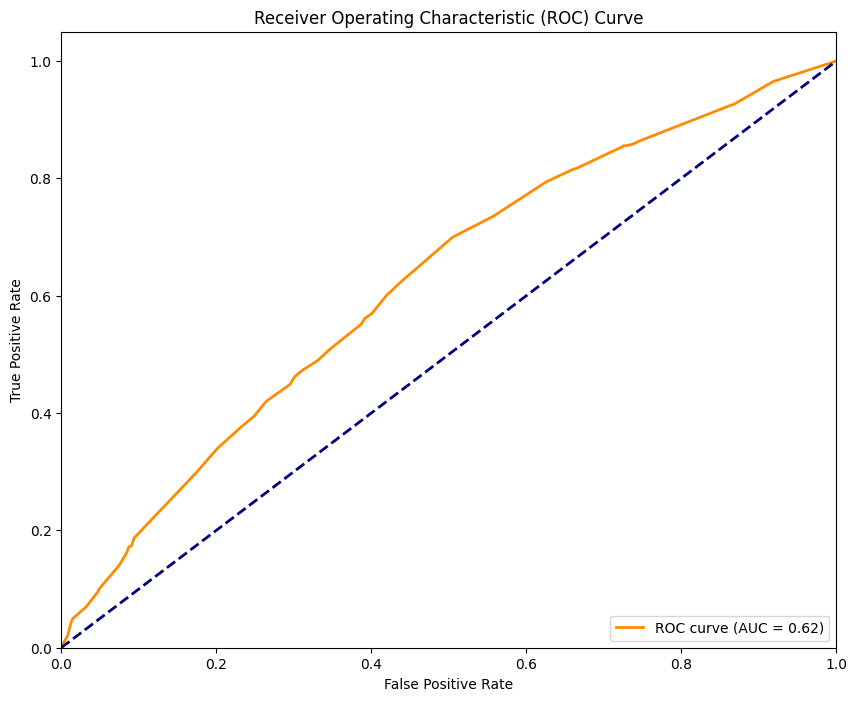

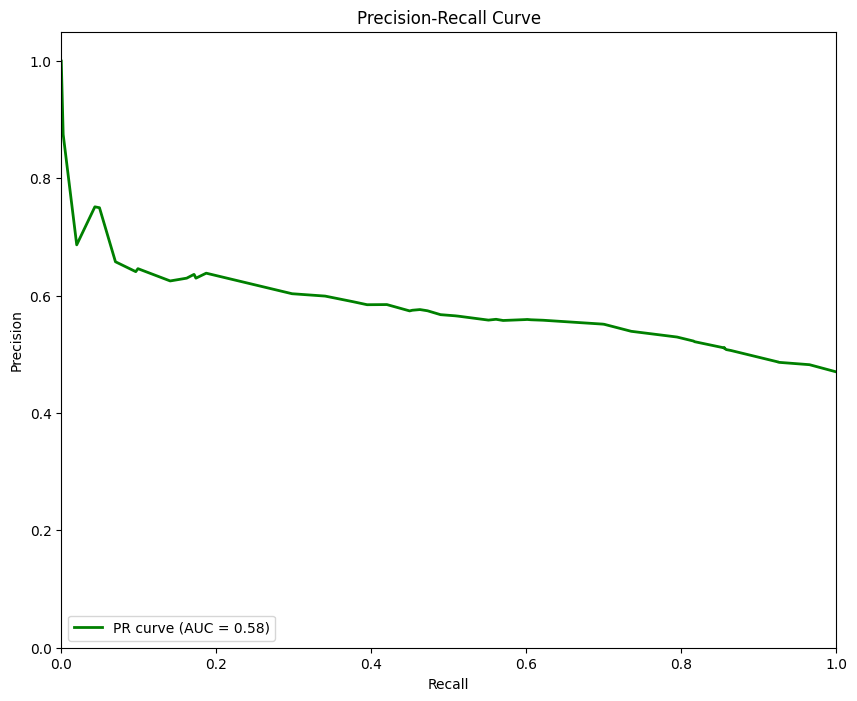

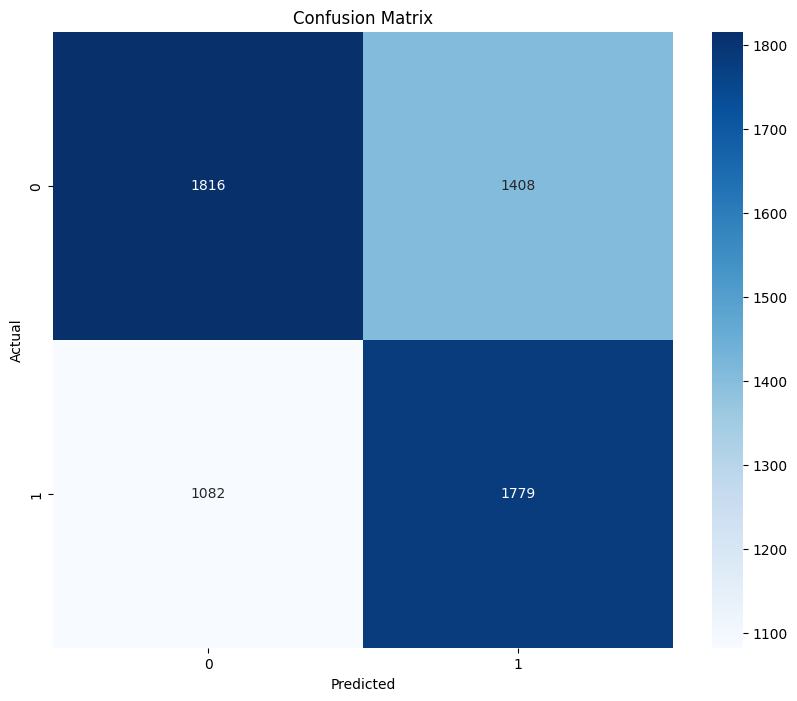

In [ ]:
# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_val, best_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, best_model.predict_proba(X_val)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Informality (Flesch-Kincaid Readability)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.2 MB/s eta 0:00:00


In [ ]:
# dataframe of Flesch-Kincaid Readability
df_fkreadability = df_original.copy()

# function to Flesch-Kincaid Readability
def calculate_fk_readability(headline):
    return textstat.flesch_kincaid_grade(headline)

df_fkreadability['fk_readability'] = df_fkreadability['headline'].apply(calculate_fk_readability)
print(df_fkreadability[['headline', 'fk_readability']].head())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 97.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


                                            headline  fk_readability
0                      £10bn bank bailout in Ireland             0.5
1  Clearing the air: Positions of Canadian partie...            10.7
2                   Football: Keïrman goes to Madrid             2.9
3  Icelandic Landsbanki Íslands earnings on the i...             9.6
4  Poll shows Prévval with clear lead, but inelig...            10.3


<ipython-input-16-3de6f70271c3>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_fkreadability, x='fk_readability', hue='sensation', shade=True)


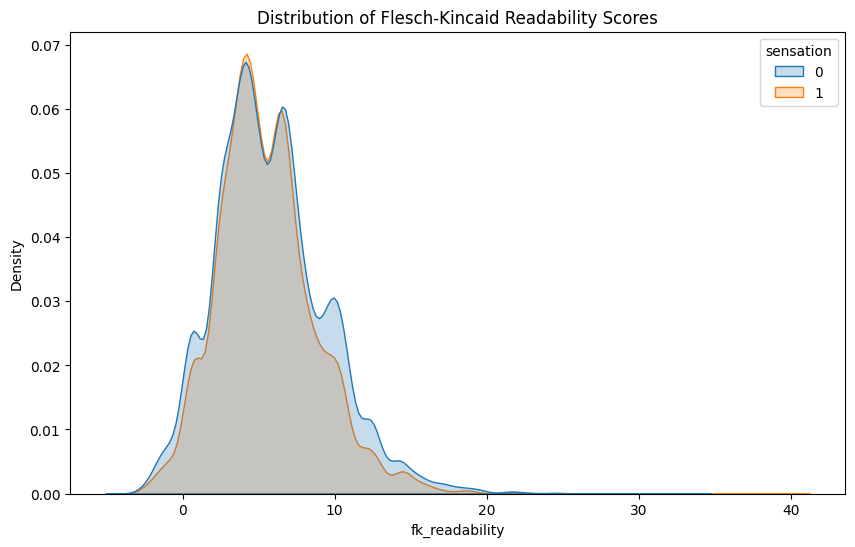

Descriptive Statistics:
             count      mean       std  min  25%  50%  75%   max
sensation                                                       
0          16117.0  5.807526  3.671430 -3.5  3.3  5.2  8.0  33.2
1          14307.0  5.520347  3.252578 -3.1  3.3  5.2  7.2  39.8

t-test results for Flesch-Kincaid Readability Scores:
t-statistic: -7.18272328883444
p-value: 6.990448965662751e-13


In [ ]:
# kernel density estimation plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_fkreadability, x='fk_readability', hue='sensation', shade=True)
plt.title('Distribution of Flesch-Kincaid Readability Scores')
plt.show()

# descriptive statistics
desc_stats = df_fkreadability.groupby('sensation')['fk_readability'].describe()
print("Descriptive Statistics:")
print(desc_stats)

# perform t-test
sensation_scores = df_fkreadability[df_fkreadability['sensation'] == 1]['fk_readability']
non_sensation_scores = df_fkreadability[df_fkreadability['sensation'] == 0]['fk_readability']
t_stat, p_value = stats.ttest_ind(sensation_scores, non_sensation_scores)

print(f"\nt-test results for Flesch-Kincaid Readability Scores:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

In [ ]:
# save .csv in utf-8
output_path = f'{base_dir}/df_fkreadability.csv'
df_fkreadability.to_csv(output_path, index=False, encoding='utf-8')

### XGBoost

In [ ]:
%%time
base_dir = '/content/drive/My Drive/seperate_0731'

def prepare_data(df_fkreadability):
    X = df_ratiostopwords.drop(['headline', 'clickbait', 'sensation_score',
                   'sensation_reason', 'emotion', 'arousal', 'arousal_score',
                   'arousal_reason', 'sensation'], axis=1)
    y = df_fkreadability['sensation']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    X_train_processed = pipeline.fit_transform(X_train)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

    X_val_processed = pipeline.transform(X_val)

    return X_train_resampled, X_val_processed, y_train_resampled, y_val, pipeline

CPU times: user 42 µs, sys: 1 µs, total: 43 µs
Wall time: 46.3 µs


In [ ]:
X_train, X_val, y_train, y_val, preprocessor = prepare_data(df_fkreadability)

# create XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist_xgb = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

# create K-Fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_xg = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

# fit on preprocessed training data
random_search_xg.fit(X_train, y_train)

print("Best parameters:", random_search_xg.best_params_)
print("Best cross-validation score:", random_search_xg.best_score_)

# use best parameters to create new model
best_params = random_search_xg.best_params_
best_model = xgb.XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric='logloss',
    early_stopping_rounds=50  # Add early stopping here
)

# train the model with early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# use best model for prediction on validation set
y_val_pred = best_model.predict(X_val)

# print classification report
print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:54:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 1.0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best cross-validation score: 0.608918170266611


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:54:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.56      0.59      3224
           1       0.56      0.62      0.59      2861

    accuracy                           0.59      6085
   macro avg       0.59      0.59      0.59      6085
weighted avg       0.59      0.59      0.59      6085



### ROC AUC

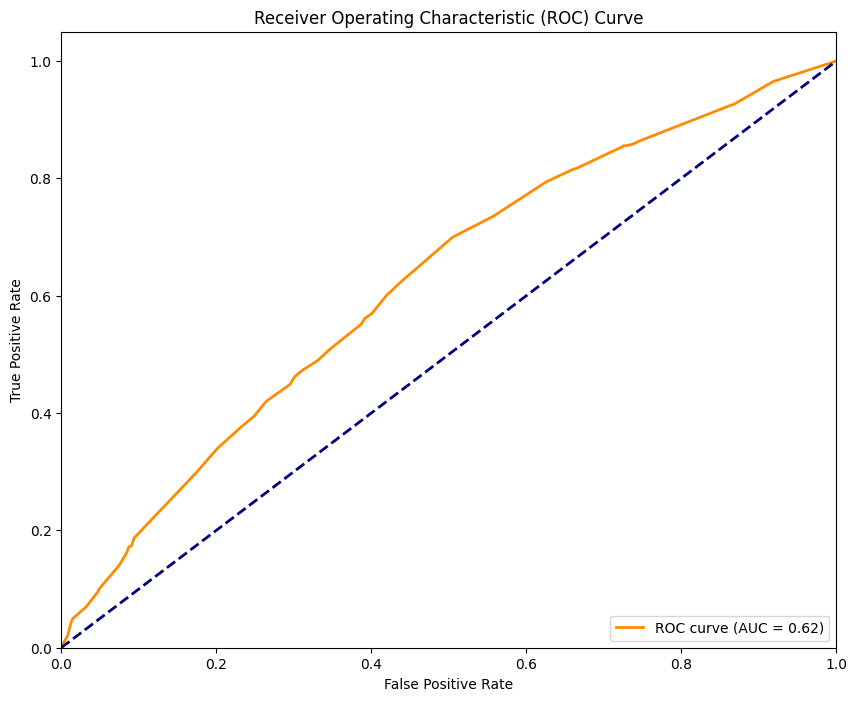

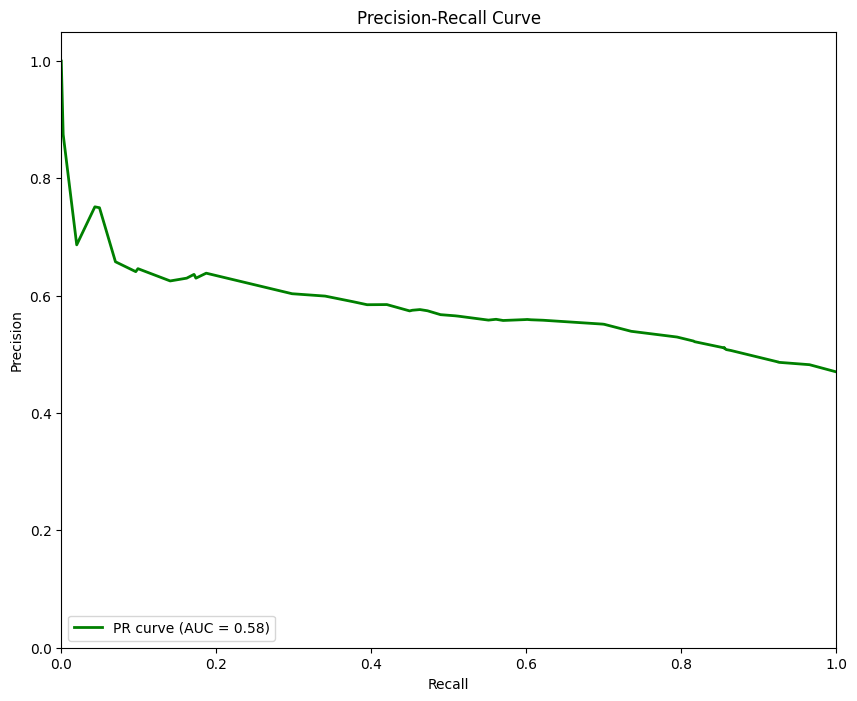

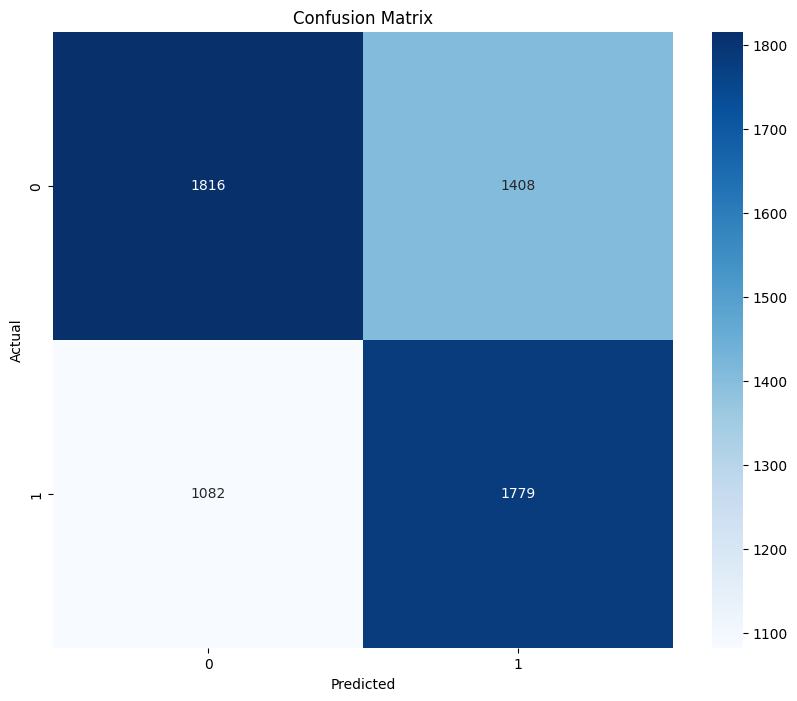

In [ ]:
# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_val, best_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, best_model.predict_proba(X_val)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Sentence Subjectivity and Objectivity Evaluation

In [ ]:
# VADER
sid = SentimentIntensityAnalyzer()

# function to define objectively and objectively
def get_subjectivity_objectivity(text):
    sentiment_scores = sid.polarity_scores(text)
    subjectivity = sentiment_scores['pos'] + sentiment_scores['neg']
    objectivity = sentiment_scores['neu']
    return subjectivity, objectivity

# calculate score
df_subobjectivity = df_original.copy()
df_subobjectivity['subjectivity'], df_subobjectivity['objectivity'] = zip(*df_fkreadability['headline'].apply(get_subjectivity_objectivity))

print(df_subobjectivity[['headline', 'subjectivity', 'objectivity']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                headline  subjectivity  \
0                          £10bn bank bailout in Ireland         0.259   
1      Clearing the air: Positions of Canadian partie...         0.231   
2                       Football: Keïrman goes to Madrid         0.000   
3      Icelandic Landsbanki Íslands earnings on the i...         0.277   
4      Poll shows Prévval with clear lead, but inelig...         0.213   
...                                                  ...           ...   
30419  Zimmerman stands before judge for the Trayvon ...         0.000   
30420  Zoo Animals Around The World Are Opening Their...         0.000   
30421  Zoo elephants live shorter lives than their wi...         0.123   
30422  Zoombak Tracks Your Dog, Your Car, Even Your C...         0.000   
30423                Zuma Faces New Charges After Ruling         0.296   

       objectivity  
0            0.741  
1            0.769  
2            1.000  
3            0.723  
4     

<ipython-input-122-8d457e528707>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_subobjectivity, x='subjectivity', hue='sensation', shade=True)
<ipython-input-122-8d457e528707>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_subobjectivity, x='objectivity', hue='sensation', shade=True)


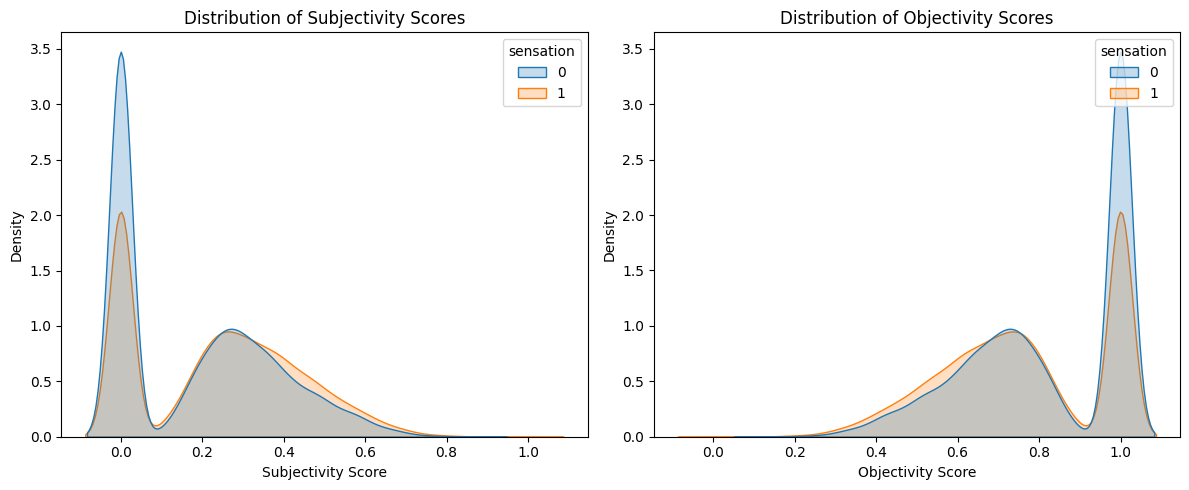


Descriptive Statistics for Subjectivity:
             count      mean       std  min  25%   50%    75%    max
sensation                                                           
0          16117.0  0.183415  0.191606  0.0  0.0  0.18  0.328  0.866
1          14307.0  0.238542  0.197175  0.0  0.0  0.25  0.382  1.000

Descriptive Statistics for Objectivity:
             count      mean       std    min    25%   50%  75%  max
sensation                                                           
0          16117.0  0.816584  0.191607  0.133  0.672  0.82  1.0  1.0
1          14307.0  0.761460  0.197172  0.000  0.618  0.75  1.0  1.0

t-test results for subjectivity:
t-statistic: 24.707227174996035
p-value: 1.854531584061693e-133

t-test results for objectivity:
t-statistic: -24.70580426584544
p-value: 1.9196675927577323e-133


In [ ]:
# kernel density estimation plot
plt.figure(figsize=(12, 5))

# subjectivity kernel density estimation plot
plt.subplot(1, 2, 1)
sns.kdeplot(data=df_subobjectivity, x='subjectivity', hue='sensation', shade=True)
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity Score')
plt.ylabel('Density')

# objectivity kernel density estimation plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_subobjectivity, x='objectivity', hue='sensation', shade=True)
plt.title('Distribution of Objectivity Scores')
plt.xlabel('Objectivity Score')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# descriptive statistics
for metric in ['subjectivity', 'objectivity']:
    print(f"\nDescriptive Statistics for {metric.capitalize()}:")
    desc_stats = df_subobjectivity.groupby('sensation')[metric].describe()
    print(desc_stats)

# t-test function
def perform_t_test(data, column):
    sensation = data[data['sensation'] == 1][column]
    non_sensation = data[data['sensation'] == 0][column]
    t_stat, p_value = stats.ttest_ind(sensation, non_sensation)

    print(f"\nt-test results for {column}:")
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_value}")

# perform t-test
perform_t_test(df_subobjectivity, 'subjectivity')
perform_t_test(df_subobjectivity, 'objectivity')

In [ ]:
# save .csv in utf-8
output_path = f'{base_dir}/df_subobjectivity.csv'
df_subobjectivity.to_csv(output_path, index=False, encoding='utf-8')

### XGBoost

In [ ]:
%%time
base_dir = '/content/drive/My Drive/seperate_0731'

def prepare_data(df_subobjectivity):
    X = df_subobjectivity.drop(['headline', 'clickbait', 'sensation_score',
                   'sensation_reason', 'emotion', 'arousal', 'arousal_score',
                   'arousal_reason', 'sensation'], axis=1)
    y = df_subobjectivity['sensation']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    X_train_processed = pipeline.fit_transform(X_train)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

    X_val_processed = pipeline.transform(X_val)

    return X_train_resampled, X_val_processed, y_train_resampled, y_val, pipeline

CPU times: user 42 µs, sys: 0 ns, total: 42 µs
Wall time: 45.1 µs


In [ ]:
X_train, X_val, y_train, y_val, preprocessor = prepare_data(df_subobjectivity)

# create XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist_xgb = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

# create K-Fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_xg = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

# fit on preprocessed training data
random_search_xg.fit(X_train, y_train)

print("Best parameters:", random_search_xg.best_params_)
print("Best cross-validation score:", random_search_xg.best_score_)

# use best parameters to create new model
best_params = random_search_xg.best_params_
best_model = xgb.XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric='logloss',
    early_stopping_rounds=50
)

# train the model with early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# use best model for prediction on validation set
y_val_pred = best_model.predict(X_val)

# print classification report
print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:27:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best cross-validation score: 0.6146555909839979


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:27:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.45      0.52      3224
           1       0.52      0.68      0.59      2861

    accuracy                           0.56      6085
   macro avg       0.57      0.57      0.56      6085
weighted avg       0.57      0.56      0.55      6085



### ROC AUC

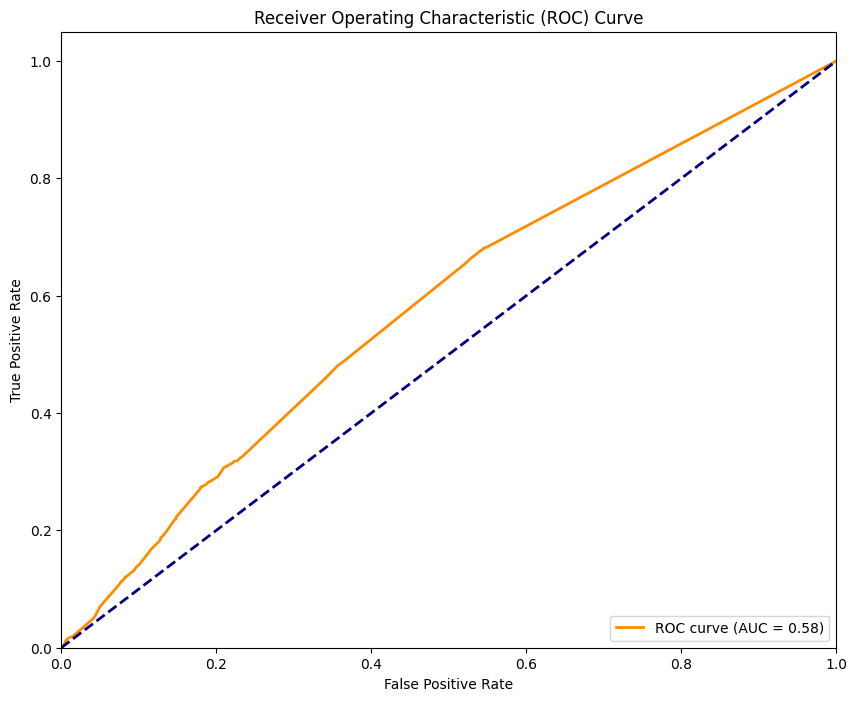

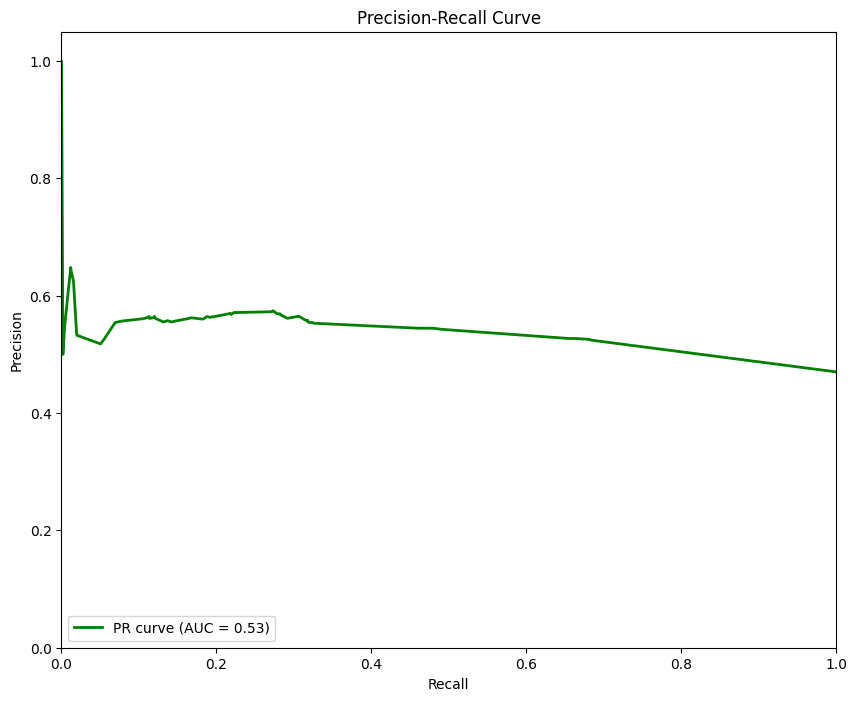

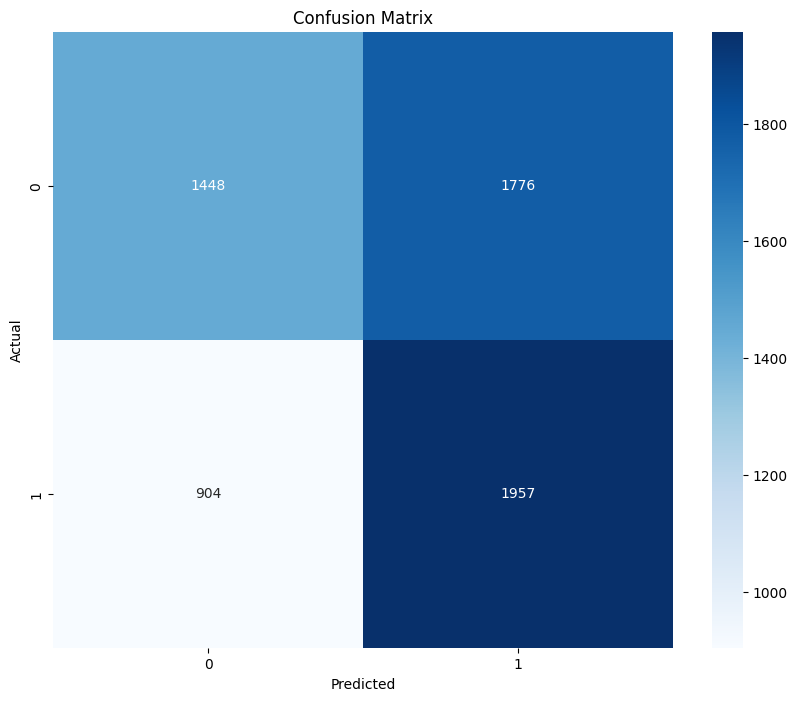

In [ ]:
# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_val, best_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, best_model.predict_proba(X_val)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Sentiment Analysis

In [ ]:
# Vader
sid = SentimentIntensityAnalyzer()

# count sentiment scores
def get_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['pos'], sentiment_scores['compound']

# calculate sentiment score
df_sentiment = df_original.copy()
df_sentiment[['neg', 'neu', 'pos', 'compound']] = df_sentiment['headline'].apply(lambda x: pd.Series(get_sentiment(x)))

print(df_sentiment[['headline', 'neg', 'neu', 'pos', 'compound']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                headline    neg    neu    pos  \
0                          £10bn bank bailout in Ireland  0.259  0.741  0.000   
1      Clearing the air: Positions of Canadian partie...  0.000  0.769  0.231   
2                       Football: Keïrman goes to Madrid  0.000  1.000  0.000   
3      Icelandic Landsbanki Íslands earnings on the i...  0.000  0.723  0.277   
4      Poll shows Prévval with clear lead, but inelig...  0.000  0.787  0.213   
...                                                  ...    ...    ...    ...   
30419  Zimmerman stands before judge for the Trayvon ...  0.000  1.000  0.000   
30420  Zoo Animals Around The World Are Opening Their...  0.000  1.000  0.000   
30421  Zoo elephants live shorter lives than their wi...  0.123  0.877  0.000   
30422  Zoombak Tracks Your Dog, Your Car, Even Your C...  0.000  1.000  0.000   
30423                Zuma Faces New Charges After Ruling  0.296  0.704  0.000   

       compound  
0       -

<ipython-input-128-cf09958ade0c>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_sentiment, x=sentiment, hue='sensation', shade=True, ax=ax)
<ipython-input-128-cf09958ade0c>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_sentiment, x=sentiment, hue='sensation', shade=True, ax=ax)
<ipython-input-128-cf09958ade0c>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_sentiment, x=sentiment, hue='sensation', shade=True, ax=ax)
<ipython-input-128-cf09958ade0c>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please u

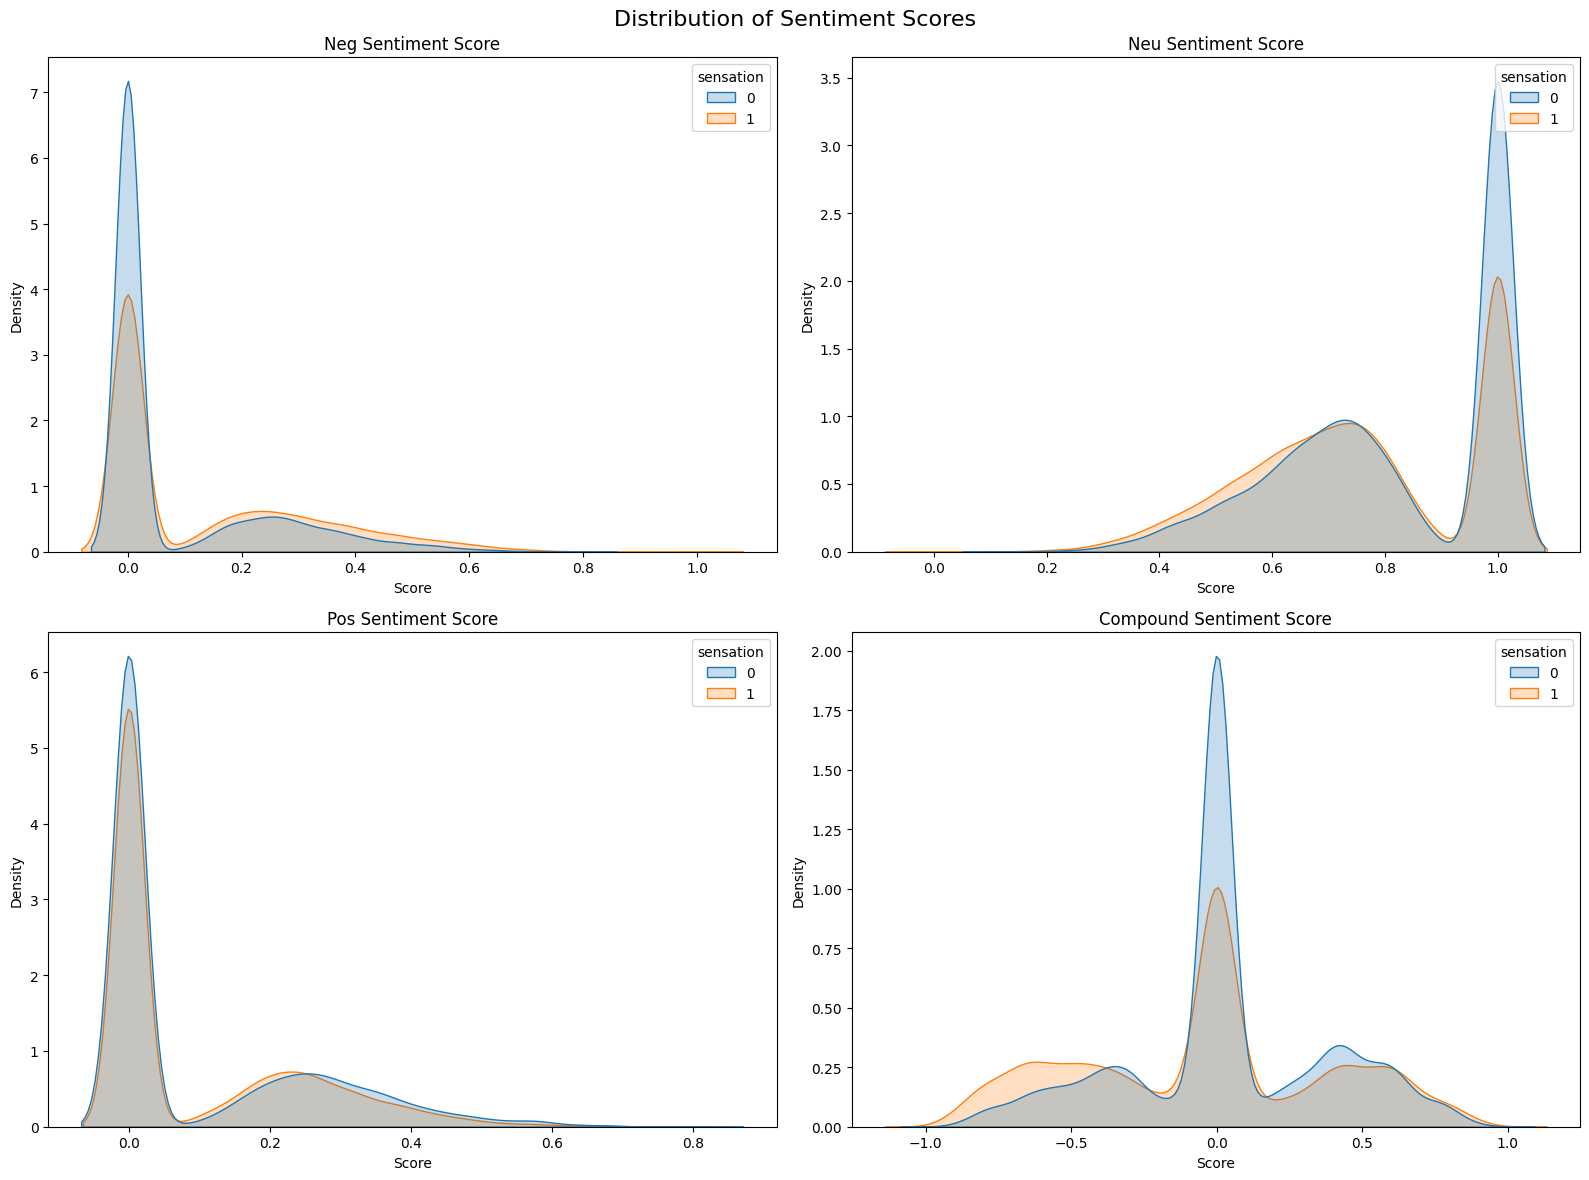


Descriptive Statistics for Neg Sentiment:
             count      mean       std  min  25%  50%    75%    max
sensation                                                          
0          16117.0  0.082470  0.148839  0.0  0.0  0.0  0.159  0.794
1          14307.0  0.139163  0.184004  0.0  0.0  0.0  0.269  1.000

Descriptive Statistics for Neu Sentiment:
             count      mean       std    min    25%   50%  75%  max
sensation                                                           
0          16117.0  0.816584  0.191607  0.133  0.672  0.82  1.0  1.0
1          14307.0  0.761460  0.197172  0.000  0.618  0.75  1.0  1.0

Descriptive Statistics for Pos Sentiment:
             count      mean       std  min  25%  50%    75%    max
sensation                                                          
0          16117.0  0.100945  0.156034  0.0  0.0  0.0  0.219  0.804
1          14307.0  0.099379  0.146665  0.0  0.0  0.0  0.213  0.773

Descriptive Statistics for Compound Sentiment:
   

In [ ]:
# kernel density estimation plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Sentiment Scores', fontsize=16)

sentiment_types = ['neg', 'neu', 'pos', 'compound']

for i, sentiment in enumerate(sentiment_types):
    ax = axes[i//2, i%2]
    sns.kdeplot(data=df_sentiment, x=sentiment, hue='sensation', shade=True, ax=ax)
    ax.set_title(f'{sentiment.capitalize()} Sentiment Score')
    ax.set_xlabel('Score')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

# descriptive statistics
for sentiment in sentiment_types:
    print(f"\nDescriptive Statistics for {sentiment.capitalize()} Sentiment:")
    desc_stats = df_sentiment.groupby('sensation')[sentiment].describe()
    print(desc_stats)

# t-test function
def perform_t_test(data, column):
    sensation = data[data['sensation'] == 1][column]
    non_sensation = data[data['sensation'] == 0][column]
    t_stat, p_value = stats.ttest_ind(sensation, non_sensation)

    print(f"\nt-test results for {column} Sentiment:")
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_value}")

# perform t-test
for sentiment in sentiment_types:
    perform_t_test(df_sentiment, sentiment)

In [ ]:
# save .csv in utf-8
output_path = f'{base_dir}/df_sentiment.csv'
df_sentiment.to_csv(output_path, index=False, encoding='utf-8')

### XGBoost

In [ ]:
%%time
base_dir = '/content/drive/My Drive/seperate_0731'

def prepare_data(df_sentiment):
    X = df_sentiment.drop(['headline', 'clickbait', 'sensation_score',
                   'sensation_reason', 'emotion', 'arousal', 'arousal_score',
                   'arousal_reason', 'sensation'], axis=1)
    y = df_sentiment['sensation']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    X_train_processed = pipeline.fit_transform(X_train)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

    X_val_processed = pipeline.transform(X_val)

    return X_train_resampled, X_val_processed, y_train_resampled, y_val, pipeline

CPU times: user 51 µs, sys: 0 ns, total: 51 µs
Wall time: 54.4 µs


In [ ]:
X_train, X_val, y_train, y_val, preprocessor = prepare_data(df_sentiment)

xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist_xgb = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_xg = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

# fit on preprocessed training data
random_search_xg.fit(X_train, y_train)

print("Best parameters:", random_search_xg.best_params_)
print("Best cross-validation score:", random_search_xg.best_score_)

# use best parameters to create new model
best_params = random_search_xg.best_params_
best_model = xgb.XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric='logloss',
    early_stopping_rounds=50
)

# train the model with early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# use best model for prediction on validation set
y_val_pred = best_model.predict(X_val)

print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:28:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best cross-validation score: 0.5853623871049011

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.70      0.66      3224
           1       0.61      0.53      0.57      2861

    accuracy                           0.62      6085
   macro avg       0.62      0.62      0.62      6085
weighted avg       0.62      0.62      0.62      6085



### ROC AUC

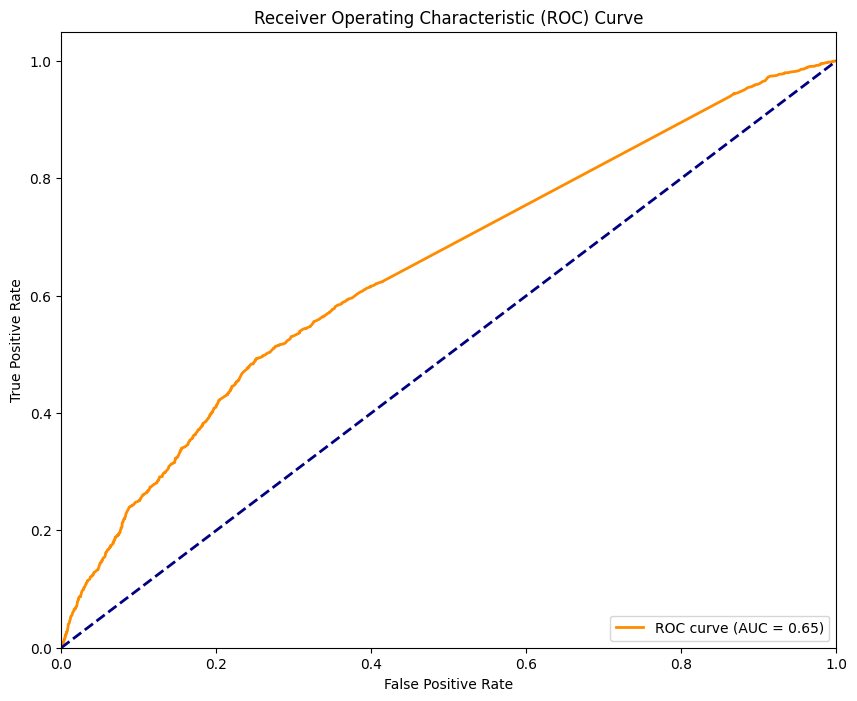

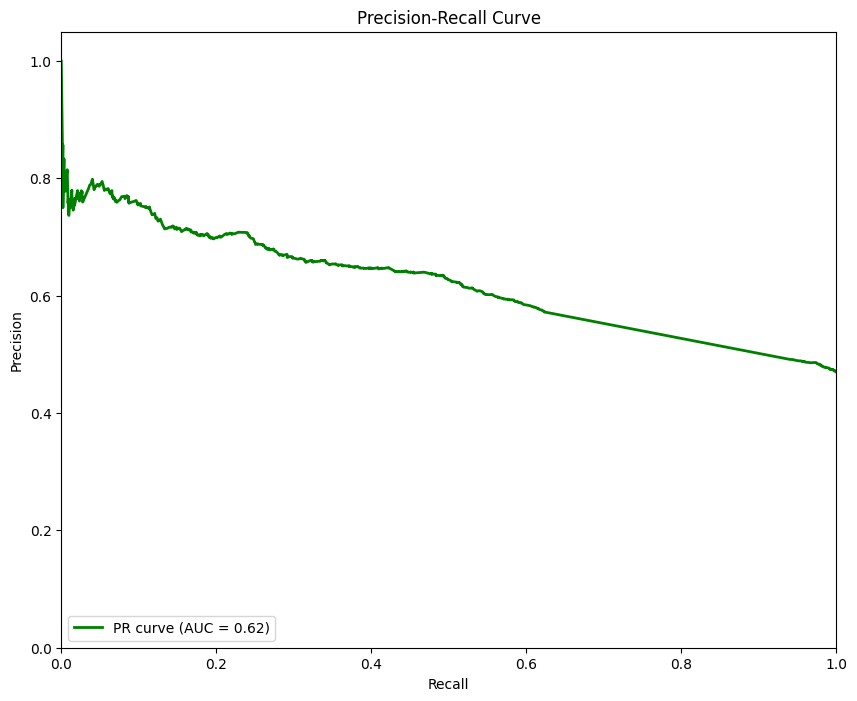

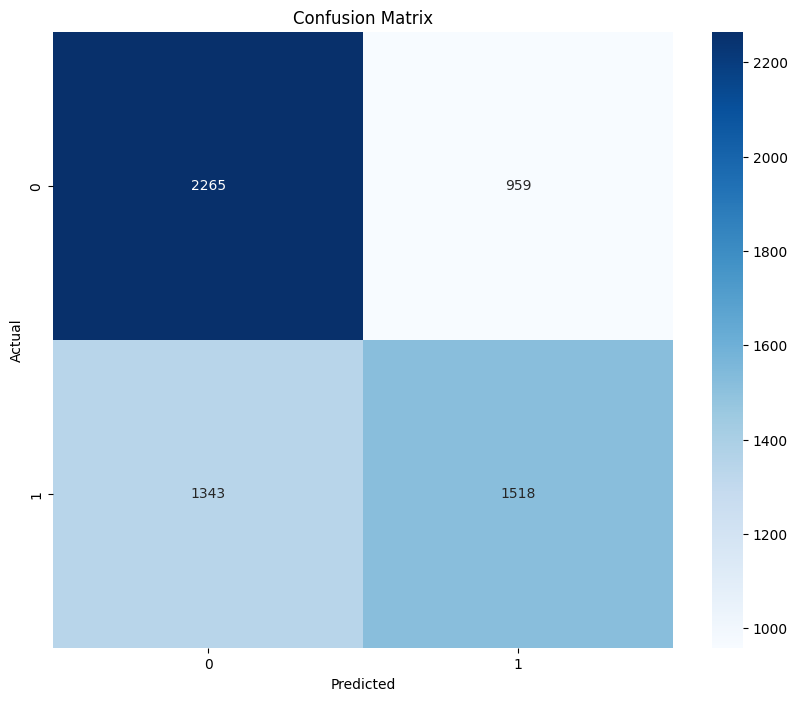

In [ ]:
# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_val, best_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, best_model.predict_proba(X_val)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Elongated Words

In [ ]:
# Elongated words dataframe
df_elongated = df_original.copy()

def count_elongated_words(text):
    elongated_pattern = re.compile(r'\b\w*(\w)\1{3,}\w*\b')
    elongated_words = elongated_pattern.findall(text)
    return len(elongated_words)

df_elongated['elongated_word_count'] = df_elongated['headline'].apply(count_elongated_words)

print(df_elongated.head())

                                            headline  clickbait  sensation  \
0                      £10bn bank bailout in Ireland          0          0   
1  Clearing the air: Positions of Canadian partie...          0          0   
2                   Football: Keïrman goes to Madrid          0          0   
3  Icelandic Landsbanki Íslands earnings on the i...          0          0   
4  Poll shows Prévval with clear lead, but inelig...          0          0   

   sensation_score                                   sensation_reason  \
0             1.10  The text is straightforward, factual, and lack...   
1             0.25  The title is factual and straightforward, lack...   
2             1.32  The text is straightforward and mildly interes...   
3             0.50  The text is factual and straightforward withou...   
4             1.35  The text is primarily informative, providing a...   

                 emotion arousal  arousal_score  \
0  anger, fear, sadness      Yes         

<ipython-input-33-aad7de4f182b>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_elongated, x='elongated_word_count', hue='sensation', shade=True)


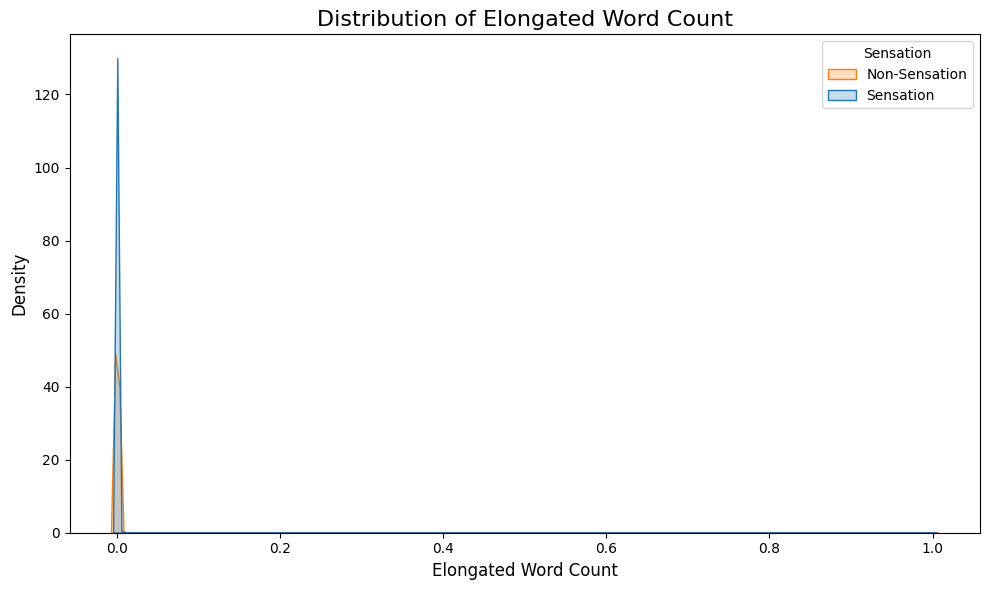

Descriptive Statistics for Elongated Word Count:
             count      mean       std  min  25%  50%  75%  max
sensation                                                      
0          16117.0  0.000124  0.011139  0.0  0.0  0.0  0.0  1.0
1          14307.0  0.000280  0.016719  0.0  0.0  0.0  0.0  1.0

t-test results for elongated_word_count:
t-statistic: 0.9640083236925258
p-value: 0.33504941532933186

Proportion of headlines with elongated words:
Sensation: 0.03%
Non-Sensation: 0.01%


In [ ]:
# kernel density estimation plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_elongated, x='elongated_word_count', hue='sensation', shade=True)
plt.title('Distribution of Elongated Word Count', fontsize=16)
plt.xlabel('Elongated Word Count', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Sensation', labels=['Non-Sensation', 'Sensation'])
plt.tight_layout()
plt.show()

# descriptive statistics
desc_stats = df_elongated.groupby('sensation')['elongated_word_count'].describe()
print("Descriptive Statistics for Elongated Word Count:")
print(desc_stats)

# # perform t-test
def perform_t_test(data, column):
    sensation = data[data['sensation'] == 1][column]
    non_sensation = data[data['sensation'] == 0][column]
    t_stat, p_value = stats.ttest_ind(sensation, non_sensation)

    print(f"\nt-test results for {column}:")
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_value}")

# perform t-test
perform_t_test(df_elongated, 'elongated_word_count')

# calculate the proportion of titles with elongated words in each category
def calculate_proportion(data, column):
    total = len(data)
    count_with_elongated = len(data[data[column] > 0])
    return count_with_elongated / total

sensation_prop = calculate_proportion(df_elongated[df_elongated['sensation'] == 1], 'elongated_word_count')
non_sensation_prop = calculate_proportion(df_elongated[df_elongated['sensation'] == 0], 'elongated_word_count')

print(f"\nProportion of headlines with elongated words:")
print(f"Sensation: {sensation_prop:.2%}")
print(f"Non-Sensation: {non_sensation_prop:.2%}")

In [ ]:
# save .csv in utf-8
output_path = f'{base_dir}/df_elongated.csv'
df_elongated.to_csv(output_path, index=False, encoding='utf-8')

### XGBoost

In [ ]:
%%time

base_dir = '/content/drive/My Drive/seperate_0731'

def prepare_data(df_elongated):
    X = df_elongated.drop(['headline', 'clickbait', 'sensation_score',
                   'sensation_reason', 'emotion', 'arousal', 'arousal_score',
                   'arousal_reason', 'sensation'], axis=1)
    y = df_elongated['sensation']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    # fit and transform on train set
    X_train_processed = pipeline.fit_transform(X_train)

    # SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

    # transform on validation set
    X_val_processed = pipeline.transform(X_val)

    return X_train_resampled, X_val_processed, y_train_resampled, y_val, pipeline

CPU times: user 59 µs, sys: 0 ns, total: 59 µs
Wall time: 63.2 µs


In [ ]:
X_train, X_val, y_train, y_val, preprocessor = prepare_data(df_elongated)

xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist_xgb = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

# K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_xg = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

# fit on preprocessed training data
random_search_xg.fit(X_train, y_train)

print("Best parameters:", random_search_xg.best_params_)
print("Best cross-validation score:", random_search_xg.best_score_)

# use best parameters to create new model
best_params = random_search_xg.best_params_
best_model = xgb.XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric='logloss',
    early_stopping_rounds=50  # Add early stopping here
)

# train the model with early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# use best model for prediction on validation set
y_val_pred = best_model.predict(X_val)

print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:28:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best cross-validation score: 0.3975923623879674

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      3224
           1       1.00      0.00      0.00      2861

    accuracy                           0.53      6085
   macro avg       0.76      0.50      0.35      6085
weighted avg       0.75      0.53      0.37      6085



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### ROC AUC

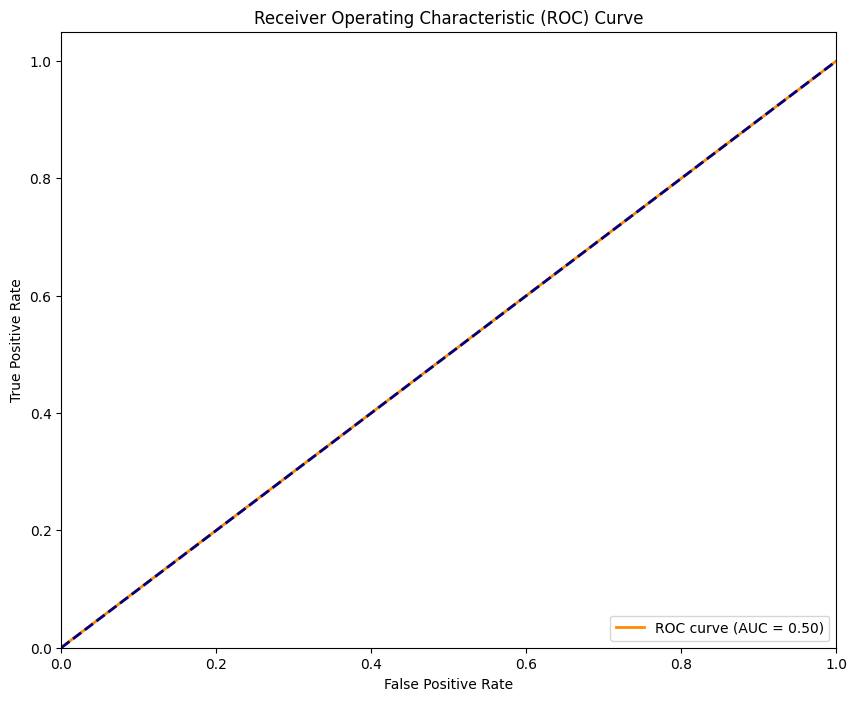

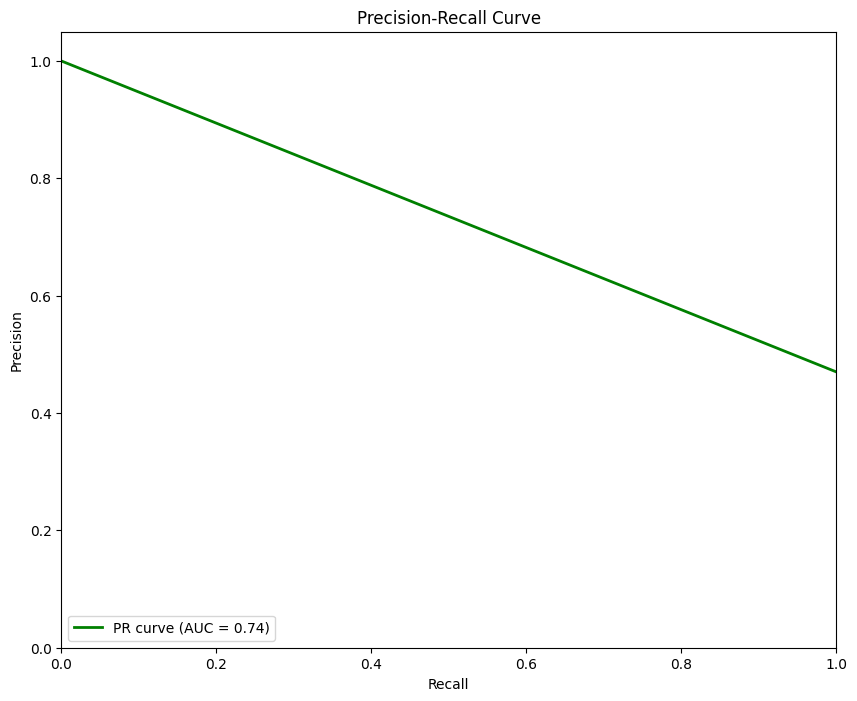

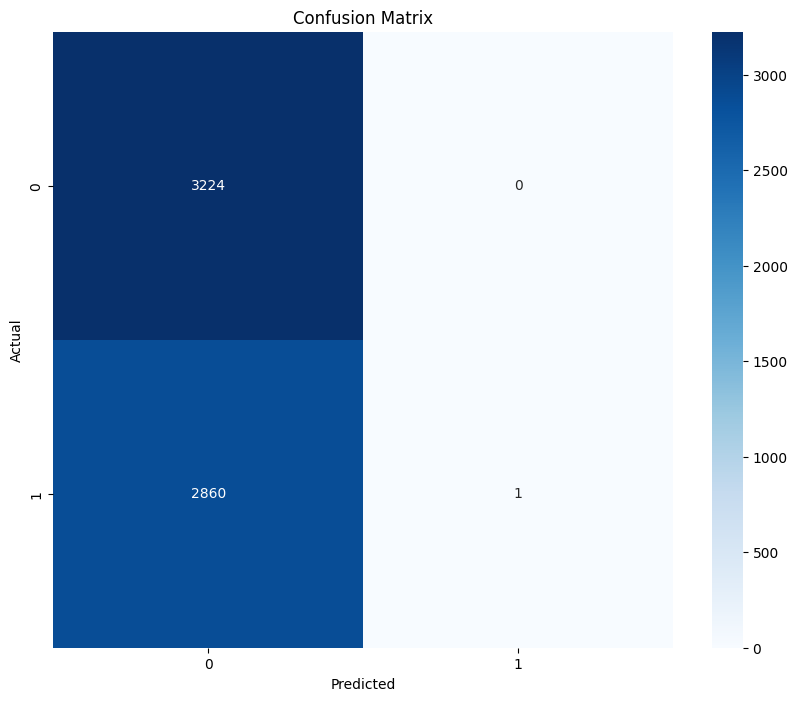

In [ ]:
# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_val, best_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, best_model.predict_proba(X_val)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Punctuation

In [ ]:
df_punctuation = df_original.copy()

def count_punctuation(text):
    contracted_word_forms_count = len(re.findall(r"\b\w+['']\w+\b", text))
    single_quotes_count = text.count("'") - contracted_word_forms_count  # remove single quotes from abbreviations
    punctuation_counts = {
        'currency_count': len(re.findall(r'[$€£]', text)),
        'exclamation_count': text.count('!'),
        'question_mark_count': text.count('?'),
        'ellipsis_count': text.count('…') + text.count('...'),
        'emphasis_count': len(re.findall(r':\*\*\*', text)),
        'multiple_exclamation_count': len(re.findall(r'!!!', text)),
        'single_quotes_count': single_quotes_count,
        'double_quotes_count': text.count('"'),
        'contracted_word_forms_count': contracted_word_forms_count
    }
    return pd.Series(punctuation_counts)

df_punctuation[['currency_count', 'exclamation_count', 'question_mark_count',
                'ellipsis_count', 'emphasis_count', 'multiple_exclamation_count',
                'single_quotes_count', 'double_quotes_count',
                'contracted_word_forms_count']] = df_punctuation['headline'].apply(count_punctuation)

print(df_punctuation.head())

total_currency = df_punctuation['currency_count'].sum()
total_exclamation = df_punctuation['exclamation_count'].sum()
total_question_mark = df_punctuation['question_mark_count'].sum()
total_ellipsis = df_punctuation['ellipsis_count'].sum()
total_emphasis = df_punctuation['emphasis_count'].sum()
total_multiple_exclamation = df_punctuation['multiple_exclamation_count'].sum()
total_single_quotes = df_punctuation['single_quotes_count'].sum()
total_double_quotes = df_punctuation['double_quotes_count'].sum()
total_quotes = total_single_quotes + total_double_quotes
total_contracted_word_forms = df_punctuation['contracted_word_forms_count'].sum()

print(f"Total number of currency signs: {total_currency}")
print(f"Total number of exclamation marks: {total_exclamation}")
print(f"Total number of question marks: {total_question_mark}")
print(f"Total number of ellipses: {total_ellipsis}")
print(f"Total number of emphasis marks: {total_emphasis}")
print(f"Total number of multiple exclamation marks: {total_multiple_exclamation}")
print(f"Total number of single quotes: {total_single_quotes}")
print(f"Total number of double quotes: {total_double_quotes}")
print(f"Total number of quotes: {total_quotes}")
print(f"Total number of contracted word forms: {total_contracted_word_forms}")

                                            headline  clickbait  sensation  \
0                      £10bn bank bailout in Ireland          0          0   
1  Clearing the air: Positions of Canadian partie...          0          0   
2                   Football: Keïrman goes to Madrid          0          0   
3  Icelandic Landsbanki Íslands earnings on the i...          0          0   
4  Poll shows Prévval with clear lead, but inelig...          0          0   

   sensation_score                                   sensation_reason  \
0             1.10  The text is straightforward, factual, and lack...   
1             0.25  The title is factual and straightforward, lack...   
2             1.32  The text is straightforward and mildly interes...   
3             0.50  The text is factual and straightforward withou...   
4             1.35  The text is primarily informative, providing a...   

                 emotion arousal  arousal_score  \
0  anger, fear, sadness      Yes         

<ipython-input-144-92d2754b8c17>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, hue='sensation', shade=True)


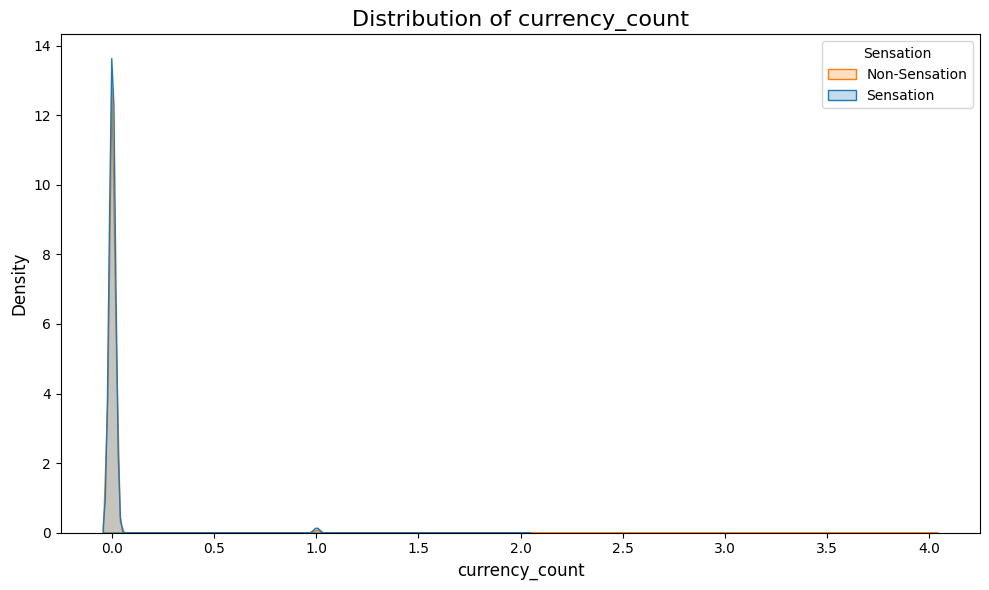


Descriptive Statistics for currency_count:
             count      mean       std  min  25%  50%  75%  max
sensation                                                      
0          16117.0  0.010858  0.104235  0.0  0.0  0.0  0.0  2.0
1          14307.0  0.008038  0.097528  0.0  0.0  0.0  0.0  4.0

t-test results for currency_count:
t-statistic: -2.4275063896807763
p-value: 0.015208782381468377

Proportion of headlines with currency_count:
Sensation: 0.75%
Non-Sensation: 1.08%


<ipython-input-144-92d2754b8c17>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, hue='sensation', shade=True)


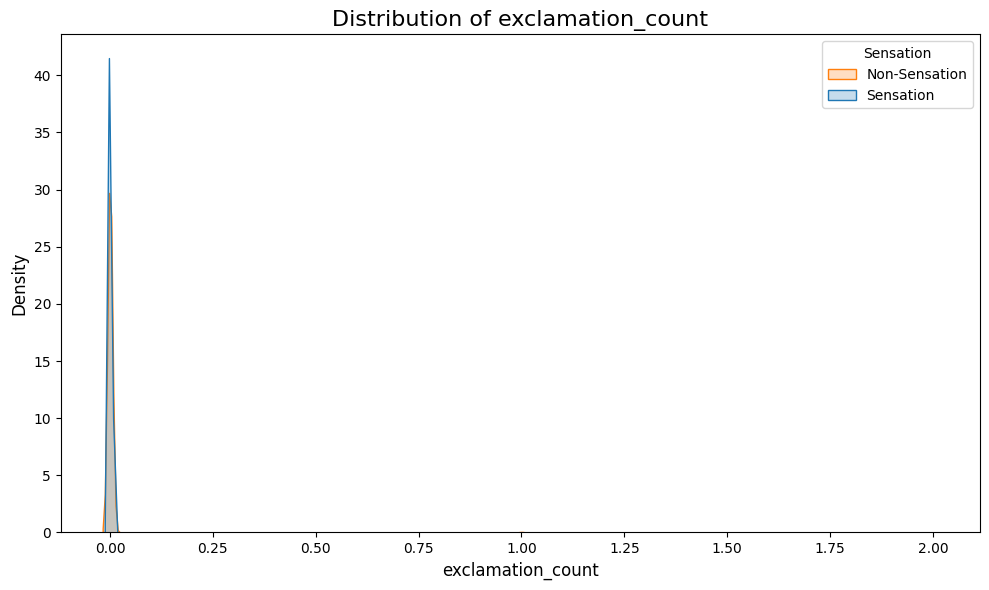


Descriptive Statistics for exclamation_count:
             count      mean       std  min  25%  50%  75%  max
sensation                                                      
0          16117.0  0.000745  0.029464  0.0  0.0  0.0  0.0  2.0
1          14307.0  0.001608  0.040064  0.0  0.0  0.0  0.0  1.0

t-test results for exclamation_count:
t-statistic: 2.1557898731789438
p-value: 0.031107892618510588

Proportion of headlines with exclamation_count:
Sensation: 0.16%
Non-Sensation: 0.07%


<ipython-input-144-92d2754b8c17>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, hue='sensation', shade=True)


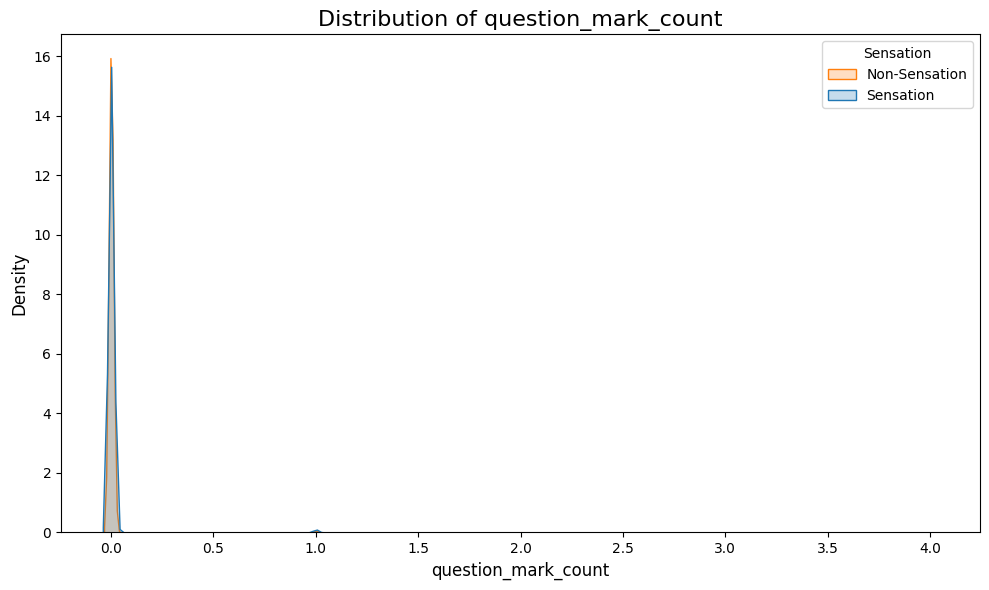


Descriptive Statistics for question_mark_count:
             count      mean       std  min  25%  50%  75%  max
sensation                                                      
0          16117.0  0.007446  0.092906  0.0  0.0  0.0  0.0  4.0
1          14307.0  0.004683  0.076939  0.0  0.0  0.0  0.0  2.0

t-test results for question_mark_count:
t-statistic: -2.8040543072034128
p-value: 0.005049637430165287

Proportion of headlines with question_mark_count:
Sensation: 0.41%
Non-Sensation: 0.70%


<ipython-input-144-92d2754b8c17>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, hue='sensation', shade=True)


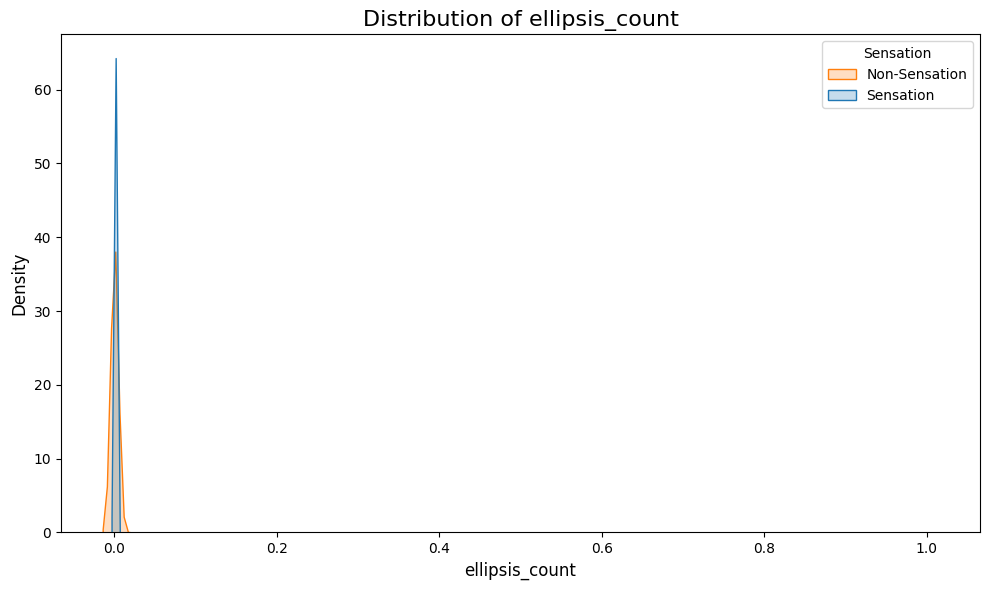


Descriptive Statistics for ellipsis_count:
             count      mean       std  min  25%  50%  75%  max
sensation                                                      
0          16117.0  0.000062  0.007877  0.0  0.0  0.0  0.0  1.0
1          14307.0  0.001048  0.032364  0.0  0.0  0.0  0.0  1.0

t-test results for ellipsis_count:
t-statistic: 3.746328433109086
p-value: 0.00017977277074799985

Proportion of headlines with ellipsis_count:
Sensation: 0.10%
Non-Sensation: 0.01%


<ipython-input-144-92d2754b8c17>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, hue='sensation', shade=True)
<ipython-input-144-92d2754b8c17>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=column, hue='sensation', shade=True)


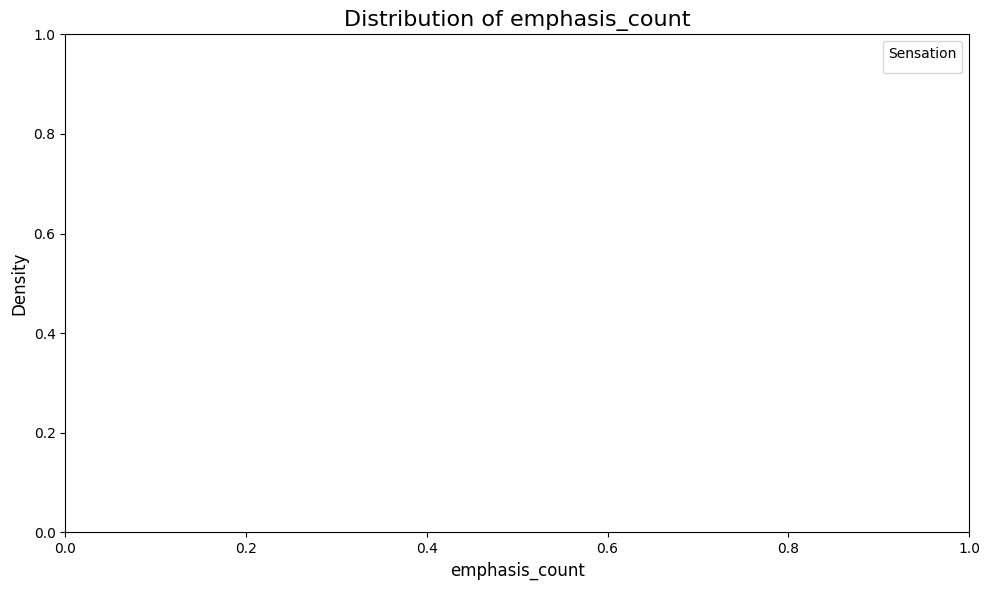


Descriptive Statistics for emphasis_count:
             count  mean  std  min  25%  50%  75%  max
sensation                                             
0          16117.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1          14307.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

t-test results for emphasis_count:
t-statistic: nan
p-value: nan

Proportion of headlines with emphasis_count:
Sensation: 0.00%
Non-Sensation: 0.00%


<ipython-input-144-92d2754b8c17>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, hue='sensation', shade=True)
<ipython-input-144-92d2754b8c17>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=column, hue='sensation', shade=True)


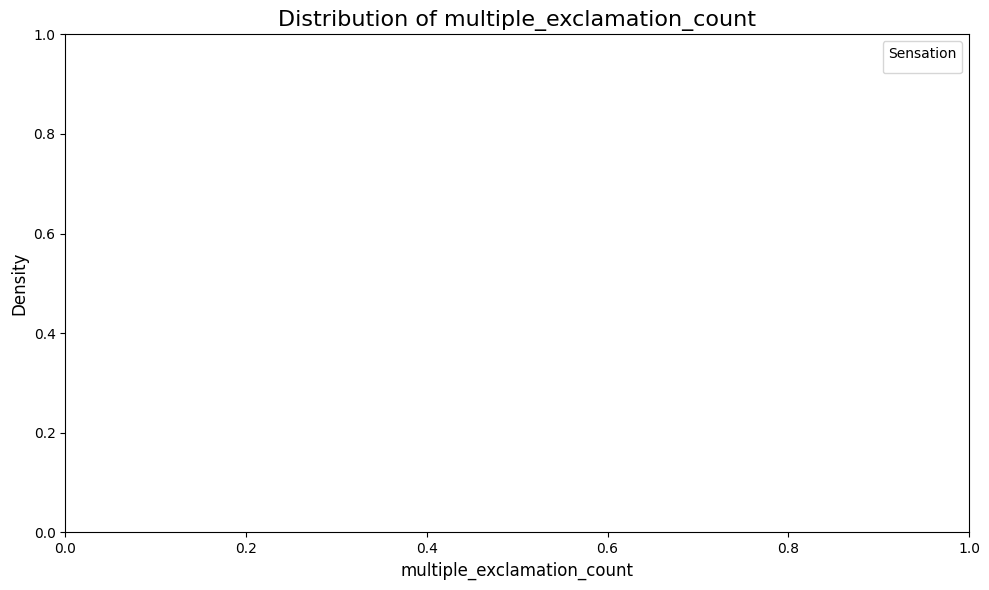


Descriptive Statistics for multiple_exclamation_count:
             count  mean  std  min  25%  50%  75%  max
sensation                                             
0          16117.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1          14307.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

t-test results for multiple_exclamation_count:
t-statistic: nan
p-value: nan

Proportion of headlines with multiple_exclamation_count:
Sensation: 0.00%
Non-Sensation: 0.00%


<ipython-input-144-92d2754b8c17>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, hue='sensation', shade=True)


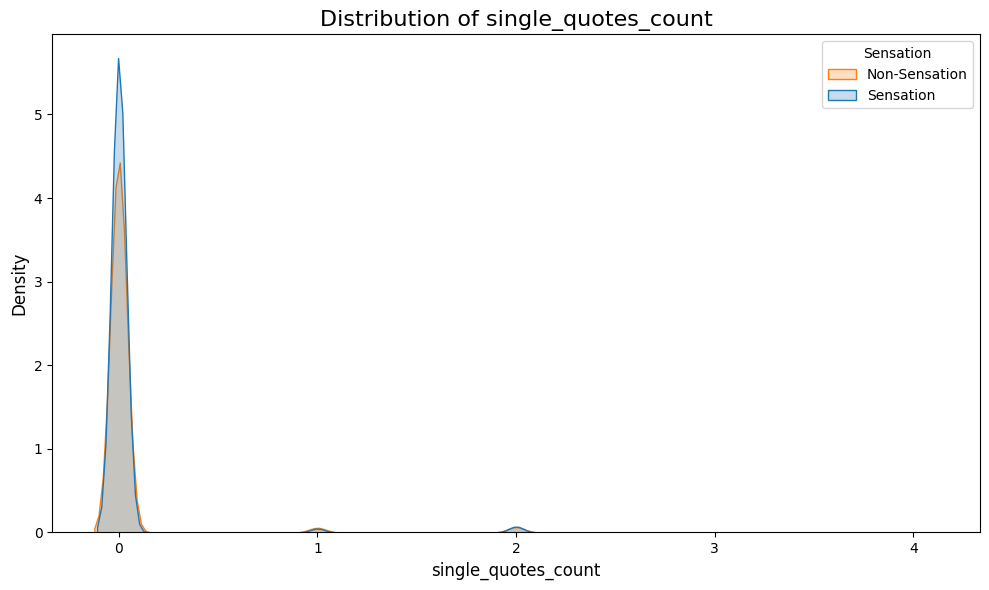


Descriptive Statistics for single_quotes_count:
             count      mean       std  min  25%  50%  75%  max
sensation                                                      
0          16117.0  0.034684  0.252268  0.0  0.0  0.0  0.0  4.0
1          14307.0  0.043335  0.277183  0.0  0.0  0.0  0.0  4.0

t-test results for single_quotes_count:
t-statistic: 2.849988197893061
p-value: 0.004375022477598291

Proportion of headlines with single_quotes_count:
Sensation: 2.73%
Non-Sensation: 2.09%


<ipython-input-144-92d2754b8c17>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, hue='sensation', shade=True)


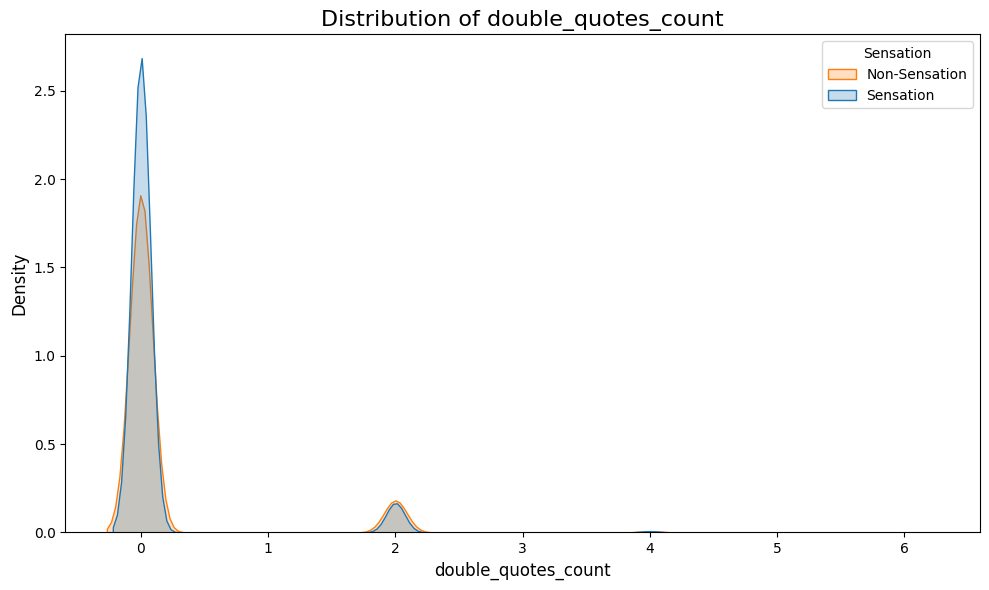


Descriptive Statistics for double_quotes_count:
             count      mean       std  min  25%  50%  75%  max
sensation                                                      
0          16117.0  0.127753  0.511348  0.0  0.0  0.0  0.0  6.0
1          14307.0  0.186622  0.605194  0.0  0.0  0.0  0.0  6.0

t-test results for double_quotes_count:
t-statistic: 9.193601976814625
p-value: 4.033856425941256e-20

Proportion of headlines with double_quotes_count:
Sensation: 9.00%
Non-Sensation: 6.12%


<ipython-input-144-92d2754b8c17>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, hue='sensation', shade=True)


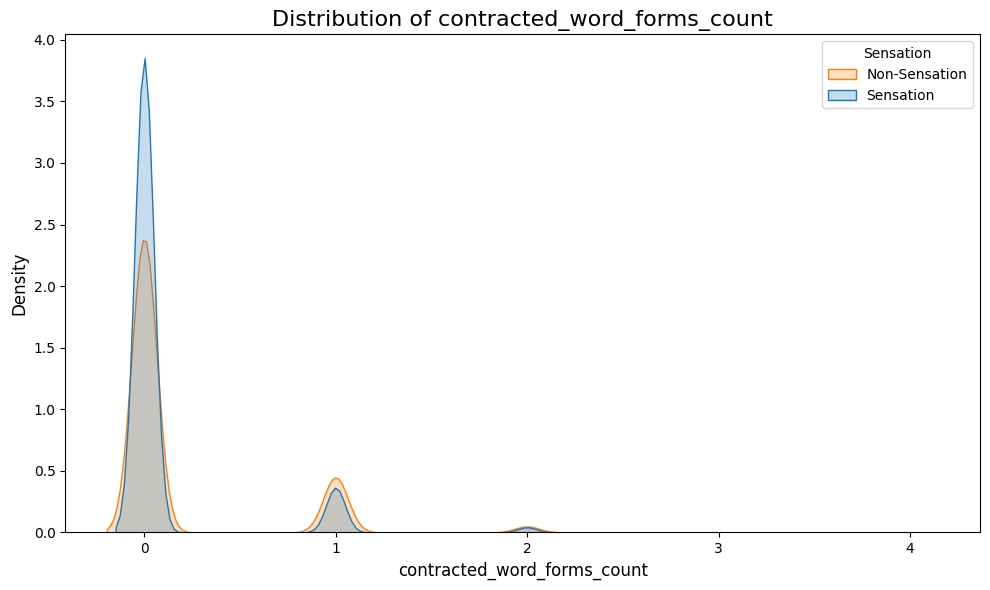


Descriptive Statistics for contracted_word_forms_count:
             count      mean       std  min  25%  50%  75%  max
sensation                                                      
0          16117.0  0.106720  0.343940  0.0  0.0  0.0  0.0  4.0
1          14307.0  0.191445  0.440396  0.0  0.0  0.0  0.0  3.0

t-test results for contracted_word_forms_count:
t-statistic: 18.803624882013693
p-value: 1.9661197050033466e-78

Proportion of headlines with contracted_word_forms_count:
Sensation: 17.28%
Non-Sensation: 9.59%


In [ ]:
def analyze_punctuation(df, column):
    #  kernel density estimation plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=column, hue='sensation', shade=True)
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(title='Sensation', labels=['Non-Sensation', 'Sensation'])
    plt.tight_layout()
    plt.show()

    # descriptive statistics
    desc_stats = df.groupby('sensation')[column].describe()
    print(f"\nDescriptive Statistics for {column}:")
    print(desc_stats)

    # t-test
    sensation = df[df['sensation'] == 1][column]
    non_sensation = df[df['sensation'] == 0][column]
    t_stat, p_value = stats.ttest_ind(sensation, non_sensation)

    print(f"\nt-test results for {column}:")
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_value}")

    # calculate the proportion of titles in each category that have this punctuation mark
    sensation_prop = (sensation > 0).mean()
    non_sensation_prop = (non_sensation > 0).mean()

    print(f"\nProportion of headlines with {column}:")
    print(f"Sensation: {sensation_prop:.2%}")
    print(f"Non-Sensation: {non_sensation_prop:.2%}")

# analyze each punctuation variable
punctuation_columns = ['currency_count', 'exclamation_count', 'question_mark_count',
                       'ellipsis_count', 'emphasis_count', 'multiple_exclamation_count',
                       'single_quotes_count', 'double_quotes_count',
                       'contracted_word_forms_count']

for column in punctuation_columns:
    analyze_punctuation(df_punctuation, column)

In [ ]:
# save .csv in utf-8
output_path = f'{base_dir}/df_punctuation.csv'
df_punctuation.to_csv(output_path, index=False, encoding='utf-8')

## Variance Threshold

In [ ]:
# select the columns to filter
punctuation_columns = ['currency_count', 'exclamation_count', 'question_mark_count',
                       'ellipsis_count', 'emphasis_count', 'multiple_exclamation_count',
                       'single_quotes_count', 'double_quotes_count',
                       'contracted_word_forms_count']

# create the feature matrix
X = df_punctuation[punctuation_columns]

# initialize VarianceThreshold
selector = VarianceThreshold()

# fit the data and transform it
X_selected = selector.fit_transform(X)

# get the boolean mask of selected features
support = selector.get_support()

# get the names of selected features
selected_features = X.columns[support]

print("Selected features:")
print(selected_features)

# print the variance of each feature
feature_variances = selector.variances_
for feature, variance in zip(X.columns, feature_variances):
    print(f"{feature}: {variance}")

# create a new DataFrame with only the selected features
df_selected_punctuation = df_punctuation[list(selected_features) + ['sensation', 'headline']]

print("\nSelected features DataFrame:")
print(df_selected_punctuation.head())

Selected features:
Index(['currency_count', 'exclamation_count', 'question_mark_count',
       'ellipsis_count', 'single_quotes_count', 'double_quotes_count',
       'contracted_word_forms_count'],
      dtype='object')
currency_count: 0.010229941327441991
exclamation_count: 0.0012148217109829772
question_mark_count: 0.007357698243474003
ellipsis_count: 0.0005256240333395812
emphasis_count: 0.0
multiple_exclamation_count: 0.0
single_quotes_count: 0.0698563974933915
double_quotes_count: 0.31159416261218686
contracted_word_forms_count: 0.15564949964941113

Selected features DataFrame:
   currency_count  exclamation_count  question_mark_count  ellipsis_count  \
0               1                  0                    0               0   
1               0                  0                    0               0   
2               0                  0                    0               0   
3               0                  0                    0               0   
4               0        

In [ ]:
# save .csv in utf-8
output_path = f'{base_dir}/df_selected_punctuation.csv'
df_punctuation.to_csv(output_path, index=False, encoding='utf-8')

### XGBoost

In [ ]:
# modify the prepare_data function for df_selected_punctuation
def prepare_data_punctuation(df_now):
    X = df_now.drop(['sensation', 'headline'], axis=1, errors='ignore')
    y = df_now['sensation']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    preprocessor = StandardScaler()

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    # fit and transform the training set
    X_train_processed = pipeline.fit_transform(X_train)

    # transform the validation set
    X_val_processed = pipeline.transform(X_val)

    return X_train_processed, X_val_processed, y_train, y_val, pipeline

X_train, X_val, y_train, y_val, preprocessor = prepare_data_punctuation(df_selected_punctuation)

xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist_xgb = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

# k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_xg = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

# fit on the preprocessed training data
random_search_xg.fit(X_train, y_train)

print("Best parameters:", random_search_xg.best_params_)
print("Best cross-validation score:", random_search_xg.best_score_)

# use best parameters to create new model
best_params = random_search_xg.best_params_
best_model = xgb.XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric='logloss',
    early_stopping_rounds=50
)

# train the model with early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# use best model for prediction on validation set
y_val_pred = best_model.predict(X_val)

print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best cross-validation score: 0.35970612589472656

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.85      0.67      3224
           1       0.58      0.24      0.34      2861

    accuracy                           0.56      6085
   macro avg       0.57      0.54      0.51      6085
weighted avg       0.57      0.56      0.52      6085



### ROC AUC

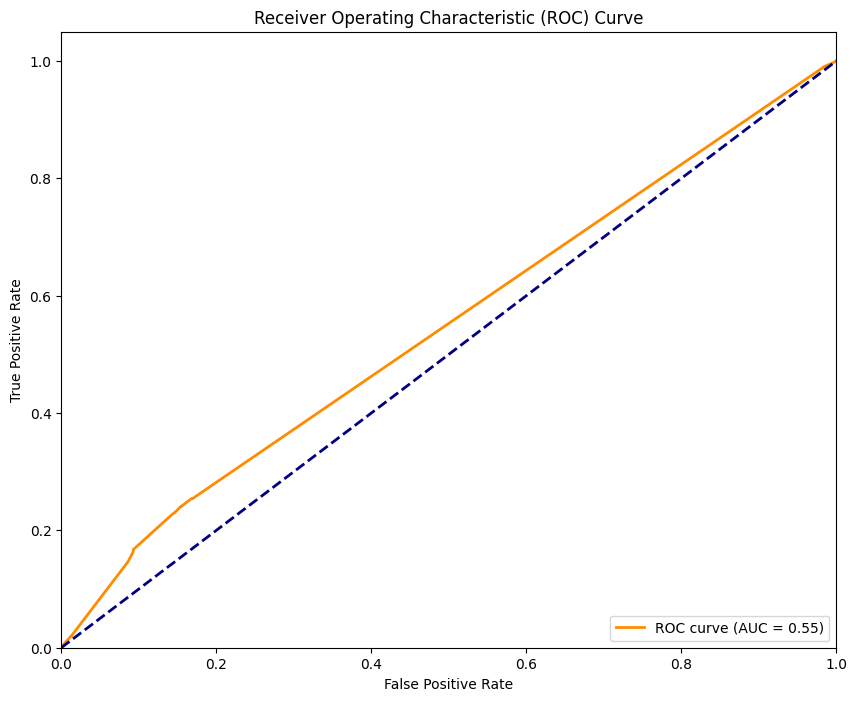

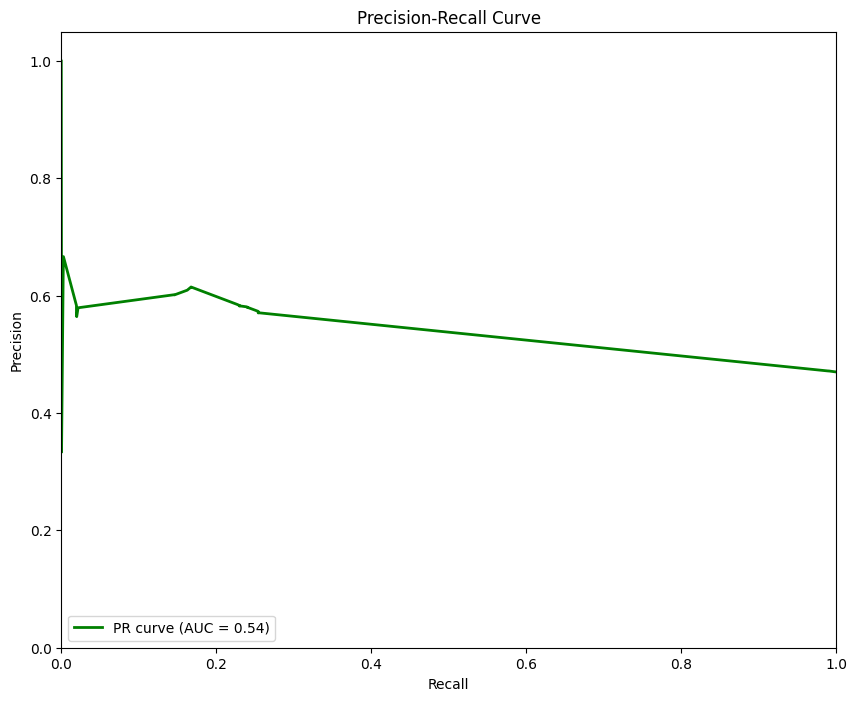

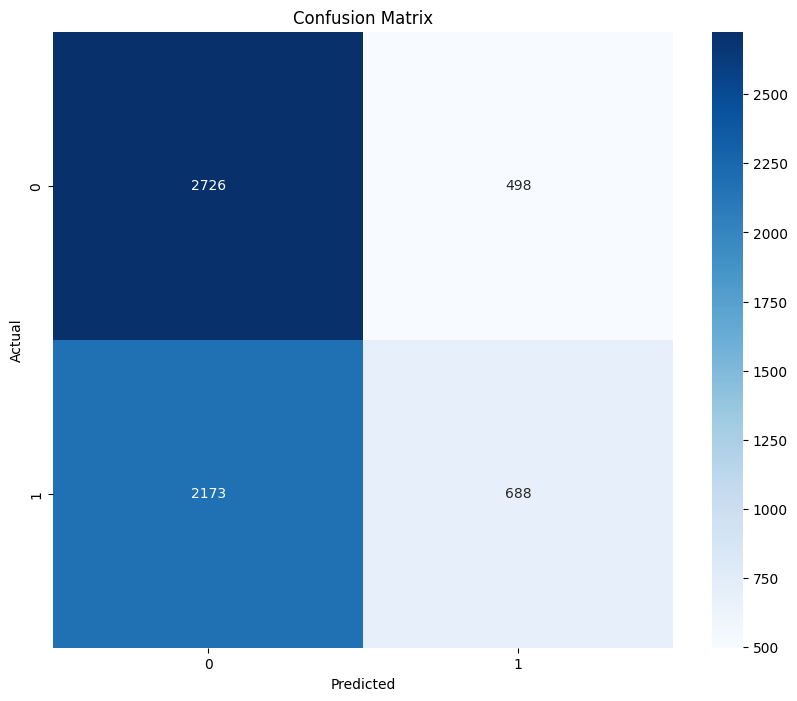

In [ ]:
# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_val, best_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, best_model.predict_proba(X_val)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## TF-IDF

### with Stopwords

In [ ]:
# dataframe TF-IDF with stopwords
df_tfidf = df_original.copy()

# calculate TF-IDF features
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_tfidf['headline'])
tfidf_feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f'tfidf_{feature}' for feature in tfidf_feature_names])

# Add TF-IDF features back to df_tfidf
df_tfidf = pd.concat([df_tfidf, tfidf_df], axis=1)

print(df_tfidf.head())

                                            headline  clickbait  sensation  \
0                      £10bn bank bailout in Ireland          0          0   
1  Clearing the air: Positions of Canadian partie...          0          0   
2                   Football: Keïrman goes to Madrid          0          0   
3  Icelandic Landsbanki Íslands earnings on the i...          0          0   
4  Poll shows Prévval with clear lead, but inelig...          0          0   

   sensation_score                                   sensation_reason  \
0             1.10  The text is straightforward, factual, and lack...   
1             0.25  The title is factual and straightforward, lack...   
2             1.32  The text is straightforward and mildly interes...   
3             0.50  The text is factual and straightforward withou...   
4             1.35  The text is primarily informative, providing a...   

                 emotion arousal  arousal_score  \
0  anger, fear, sadness      Yes         

In [ ]:
# save .csv in utf-8
output_path = f'{base_dir}/df_tfidf.csv'
df_tfidf.to_csv(output_path, index=False, encoding='utf-8')

In [ ]:
# load the dataframe
input_path = f'{base_dir}/df_tfidf.csv'
df_tfidf = pd.read_csv(input_path, encoding='utf-8')

# initialize variancethreshold with a lower threshold
variance_threshold = VarianceThreshold(threshold=0.001)

# select tf-idf feature columns
tfidf_columns = [col for col in df_tfidf.columns if col.startswith('tfidf_')]

# apply variance threshold for feature selection
tfidf_features = df_tfidf[tfidf_columns]
selected_features = variance_threshold.fit_transform(tfidf_features)
selected_feature_names = [tfidf_columns[i] for i in range(len(tfidf_columns)) if variance_threshold.variances_[i] >= 0.001]

# add selected features back to the original dataframe
df_selected_tfidf = pd.DataFrame(selected_features, columns=selected_feature_names)
df_tfidf_selected = pd.concat([df_tfidf.drop(tfidf_columns, axis=1), df_selected_tfidf], axis=1)

print(df_tfidf_selected.head())

                                            headline  clickbait  sensation  \
0                      £10bn bank bailout in Ireland          0          0   
1  Clearing the air: Positions of Canadian partie...          0          0   
2                   Football: Keïrman goes to Madrid          0          0   
3  Icelandic Landsbanki Íslands earnings on the i...          0          0   
4  Poll shows Prévval with clear lead, but inelig...          0          0   

   sensation_score                                   sensation_reason  \
0             1.10  The text is straightforward, factual, and lack...   
1             0.25  The title is factual and straightforward, lack...   
2             1.32  The text is straightforward and mildly interes...   
3             0.50  The text is factual and straightforward withou...   
4             1.35  The text is primarily informative, providing a...   

                 emotion arousal  arousal_score  \
0  anger, fear, sadness      Yes         

In [ ]:
# save the selected dataframe as a csv file
output_selected_path = f'{base_dir}/df_tfidf_selected.csv'
df_tfidf_selected.to_csv(output_selected_path, index=False, encoding='utf-8')

### XGBoost

In [ ]:
%%time
base_dir = '/content/drive/My Drive/seperate_0731'

def prepare_data(df_sentiment):
    X = df_sentiment.drop(['headline', 'clickbait', 'sensation_score',
                   'sensation_reason', 'emotion', 'arousal', 'arousal_score',
                   'arousal_reason', 'sensation'], axis=1)
    y = df_sentiment['sensation']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    X_train_processed = pipeline.fit_transform(X_train)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

    X_val_processed = pipeline.transform(X_val)

    return X_train_resampled, X_val_processed, y_train_resampled, y_val, pipeline

CPU times: user 38 µs, sys: 2 µs, total: 40 µs
Wall time: 42.7 µs


In [ ]:
X_train, X_val, y_train, y_val, preprocessor = prepare_data(df_tfidf_selected)

xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist_xgb = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_xg = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

# fit on preprocessed training data
random_search_xg.fit(X_train, y_train)

print("Best parameters:", random_search_xg.best_params_)
print("Best cross-validation score:", random_search_xg.best_score_)

# use best parameters to create new model
best_params = random_search_xg.best_params_
best_model = xgb.XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric='logloss',
    early_stopping_rounds=50  # Add early stopping here
)

# train the model with early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# use best model for prediction on validation set
y_val_pred = best_model.predict(X_val)

print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:38:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best cross-validation score: 0.6168231099356203


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:38:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71      3224
           1       0.68      0.52      0.59      2861

    accuracy                           0.66      6085
   macro avg       0.67      0.65      0.65      6085
weighted avg       0.66      0.66      0.65      6085



### ROC AUC

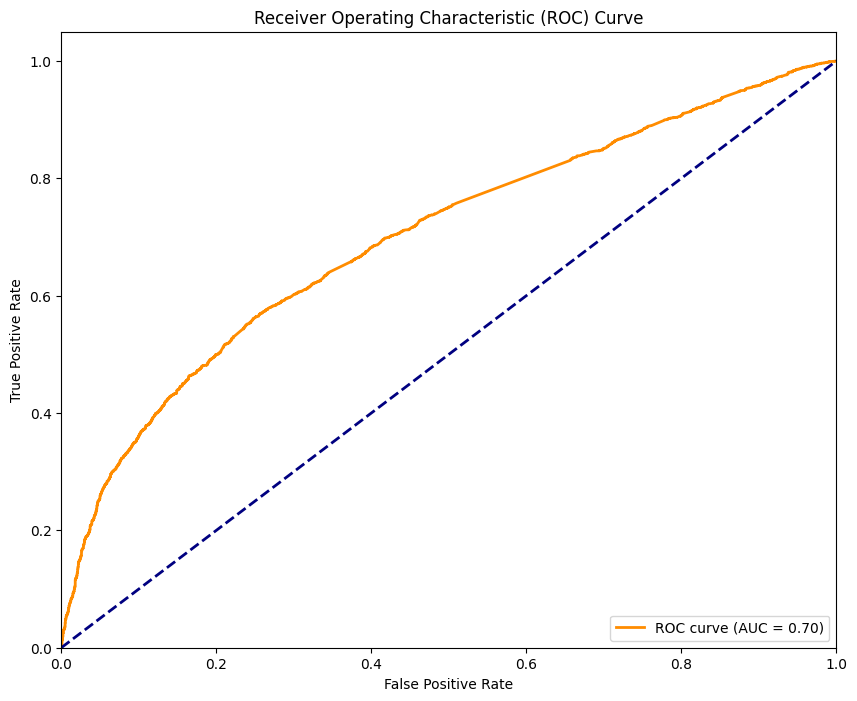

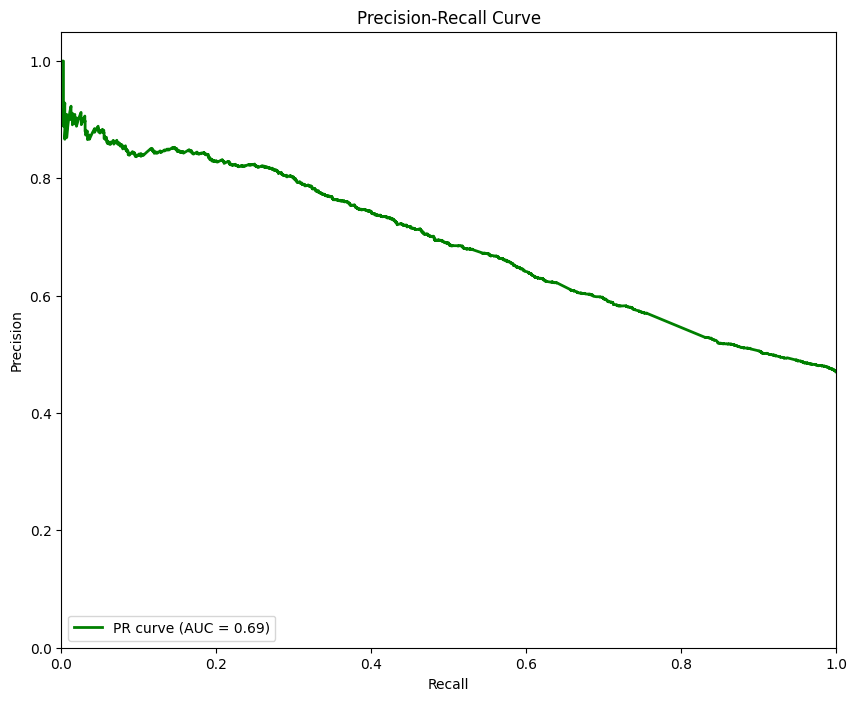

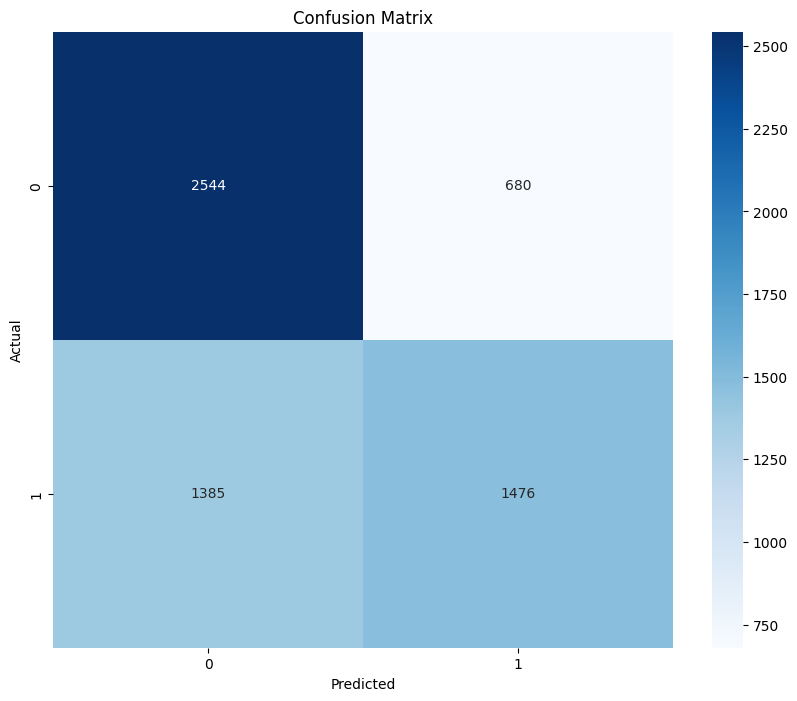

In [ ]:
# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_val, best_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, best_model.predict_proba(X_val)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### w/o stopwords

In [ ]:

# load the spacy model for English language
nlp = spacy.load('en_core_web_sm')

# function to remove stopwords using spacy
def remove_stopwords(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop])

# dataframe TF-IDF with stopwords removed
df_tfidf_wostop = df_original.copy()

# apply the function to remove stopwords
df_tfidf_wostop['cleaned_headline'] = df_tfidf_wostop['headline'].apply(remove_stopwords)

# calculate TF-IDF features, now without stopwords
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_tfidf_wostop['cleaned_headline'])
tfidf_feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f'tfidf_{feature}' for feature in tfidf_feature_names])

# add TF-IDF features back to df_tfidf_wostop
df_tfidf_wostop = pd.concat([df_tfidf_wostop, tfidf_df], axis=1)

print(df_tfidf_wostop.head())

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


                                            headline  clickbait  sensation  \
0                      £10bn bank bailout in Ireland          0          0   
1  Clearing the air: Positions of Canadian partie...          0          0   
2                   Football: Keïrman goes to Madrid          0          0   
3  Icelandic Landsbanki Íslands earnings on the i...          0          0   
4  Poll shows Prévval with clear lead, but inelig...          0          0   

   sensation_score                                   sensation_reason  \
0             1.10  The text is straightforward, factual, and lack...   
1             0.25  The title is factual and straightforward, lack...   
2             1.32  The text is straightforward and mildly interes...   
3             0.50  The text is factual and straightforward withou...   
4             1.35  The text is primarily informative, providing a...   

                 emotion arousal  arousal_score  \
0  anger, fear, sadness      Yes         

In [ ]:
# save .csv in utf-8
output_path = f'{base_dir}/df_tfidf_wostop.csv'
df_tfidf_wostop.to_csv(output_path, index=False, encoding='utf-8')

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# load the dataframe
input_path = f'{base_dir}/df_tfidf_wostop.csv'
df_tfidf_wostop = pd.read_csv(input_path, encoding='utf-8')

# initialize VarianceThreshold with a lower threshold
variance_threshold = VarianceThreshold(threshold=0.001)

# select TF-IDF feature columns
tfidf_columns = [col for col in df_tfidf_wostop.columns if col.startswith('tfidf_')]

# apply Variance Threshold for feature selection
tfidf_features = df_tfidf_wostop[tfidf_columns]
selected_features = variance_threshold.fit_transform(tfidf_features)
selected_feature_names = [tfidf_columns[i] for i in range(len(tfidf_columns)) if variance_threshold.variances_[i] >= 0.001]

# create a DataFrame for the selected features
df_selected_tfidf = pd.DataFrame(selected_features, columns=selected_feature_names)

# add selected features back to the original dataframe
df_tfidf_wostop_selected = pd.concat([df_tfidf_wostop.drop(tfidf_columns, axis=1), df_selected_tfidf], axis=1)

print(df_tfidf_wostop_selected.head())


                                            headline  clickbait  sensation  \
0                      £10bn bank bailout in Ireland          0          0   
1  Clearing the air: Positions of Canadian partie...          0          0   
2                   Football: Keïrman goes to Madrid          0          0   
3  Icelandic Landsbanki Íslands earnings on the i...          0          0   
4  Poll shows Prévval with clear lead, but inelig...          0          0   

   sensation_score                                   sensation_reason  \
0             1.10  The text is straightforward, factual, and lack...   
1             0.25  The title is factual and straightforward, lack...   
2             1.32  The text is straightforward and mildly interes...   
3             0.50  The text is factual and straightforward withou...   
4             1.35  The text is primarily informative, providing a...   

                 emotion arousal  arousal_score  \
0  anger, fear, sadness      Yes         

In [ ]:
# save the selected dataframe as a CSV file
output_selected_path = f'{base_dir}/df_tfidf_wostop_selected.csv'
df_tfidf_wostop_selected.to_csv(output_selected_path, index=False, encoding='utf-8')

### XGBoost

In [ ]:
base_dir = '/content/drive/My Drive/seperate_0731'

def prepare_data(df_sentiment):
    X = df_sentiment.drop(['headline', 'clickbait', 'sensation_score',
                   'sensation_reason', 'emotion', 'arousal', 'arousal_score',
                   'arousal_reason', 'sensation'], axis=1)
    y = df_sentiment['sensation']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    X_train_processed = pipeline.fit_transform(X_train)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

    X_val_processed = pipeline.transform(X_val)

    return X_train_resampled, X_val_processed, y_train_resampled, y_val, pipeline

CPU times: user 40 µs, sys: 0 ns, total: 40 µs
Wall time: 44.1 µs


In [ ]:
X_train, X_val, y_train, y_val, preprocessor = prepare_data(df_tfidf_wostop_selected)

xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist_xgb = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_xg = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

# fit on preprocessed training data
random_search_xg.fit(X_train, y_train)

print("Best parameters:", random_search_xg.best_params_)
print("Best cross-validation score:", random_search_xg.best_score_)

# use best parameters to create new model
best_params = random_search_xg.best_params_
best_model = xgb.XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric='logloss',
    early_stopping_rounds=50  # Add early stopping here
)

# train the model with early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# use best model for prediction on validation set
y_val_pred = best_model.predict(X_val)

print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:58:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best cross-validation score: 0.5345758987416854


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:58:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.84      0.69      3224
           1       0.66      0.34      0.45      2861

    accuracy                           0.61      6085
   macro avg       0.63      0.59      0.57      6085
weighted avg       0.62      0.61      0.58      6085



### ROC AUC

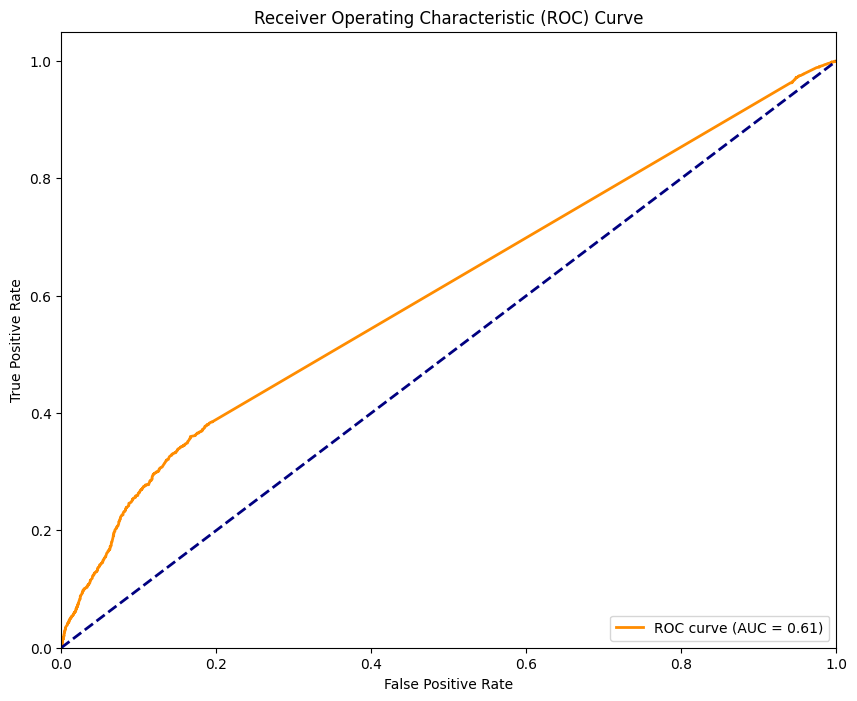

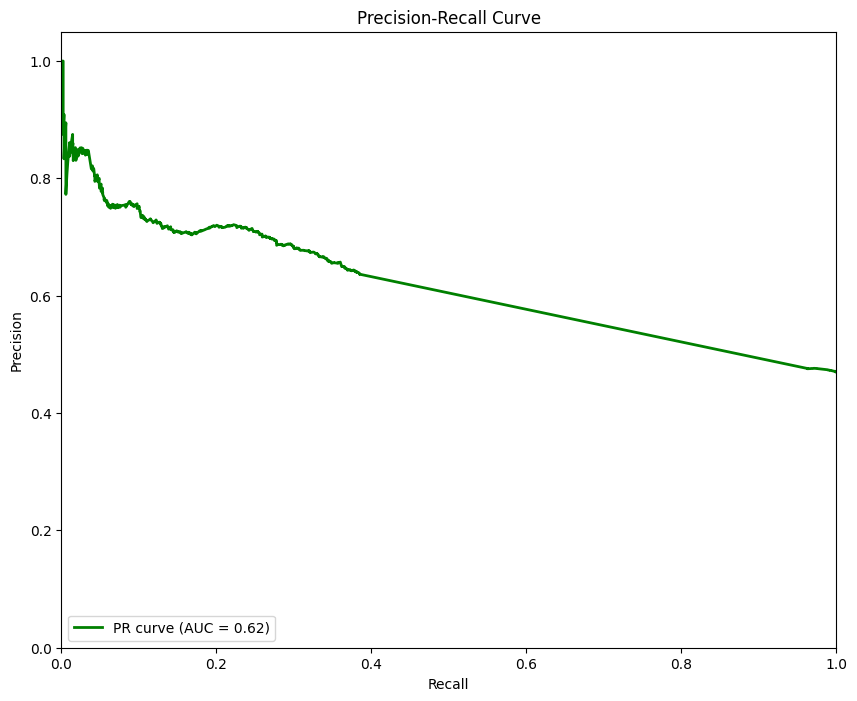

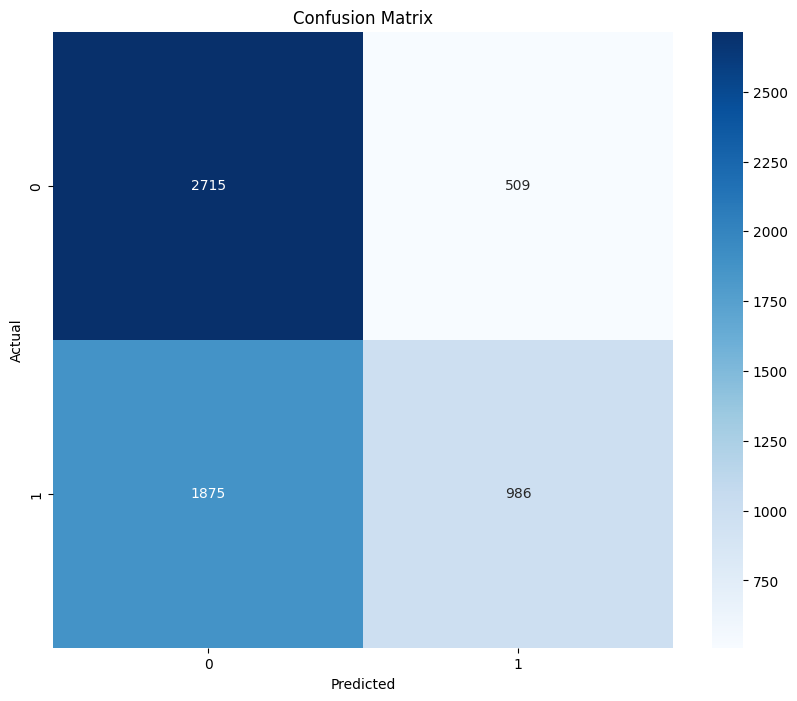

In [ ]:
# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_val, best_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, best_model.predict_proba(X_val)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Syntactic Ngrams

In [ ]:
%%time

nlp = spacy.load("en_core_web_sm")

df_4grams_syntactic = df_original.copy()

# extract dependency tags
def extract_dep_tags(doc):
    return [token.dep_ for token in doc]

# apply function and calculate stats
df_4grams_syntactic['dep_tags'] = df_4grams_syntactic['headline'].apply(lambda x: extract_dep_tags(nlp(x)))

# calculate dependency stats
dep_counts = df_4grams_syntactic['dep_tags'].apply(len)

min_deps = dep_counts.min()
max_deps = dep_counts.max()
avg_deps = dep_counts.mean()

print("\ndependency stats:")
print(f"min dependencies: {min_deps}")
print(f"max dependencies: {max_deps}")
print(f"average dependencies: {avg_deps:.2f}")

# calculate syntactic tree depth
def tree_depth(doc):
    def token_depth(token):
        depth = 0
        while token.head != token:
            token = token.head
            depth += 1
        return depth

    return max(token_depth(token) for token in doc)

# apply function to dataframe
df_4grams_syntactic['tree_depth'] = df_4grams_syntactic['headline'].apply(lambda x: tree_depth(nlp(x)))

min_depth = df_4grams_syntactic['tree_depth'].min()
max_depth = df_4grams_syntactic['tree_depth'].max()
avg_depth = df_4grams_syntactic['tree_depth'].mean()

print("\ntree depth stats:")
print(f"min tree depth: {min_depth}")
print(f"max tree depth: {max_depth}")
print(f"average tree depth: {avg_depth:.2f}")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)



dependency stats:
min dependencies: 1
max dependencies: 27
average dependencies: 9.80

tree depth stats:
min tree depth: 0
max tree depth: 11
average tree depth: 3.53
CPU times: user 6min 2s, sys: 725 ms, total: 6min 3s
Wall time: 6min 2s


In [ ]:
output_path = f'{base_dir}/df_depth_syntactic.csv'
df_4grams_syntactic.to_csv(output_path, index=False, encoding='utf-8')

print(f"\nsave to: {output_path}")


save to: /content/drive/My Drive/seperate_0731/df_depth_syntactic.csv


In [ ]:
# del dep_counts, min_deps, max_deps, avg_deps
# gc.collect()

In [ ]:
%%time

n = int(4)

# generate dependency n-grams and count them
def generate_syntactic_ngrams(dep_tags, n):
    dep_ngrams = list(ngrams(dep_tags, n))
    return Counter(dep_ngrams)

# generate n-gram features for each headline
def add_syntactic_ngram_features(df, n):
    df[f'syntactic_{n}grams'] = df['dep_tags'].apply(lambda tags: generate_syntactic_ngrams(tags, n))
    return df

# expand n-gram features into separate columns
def expand_ngrams(df, n, prefix='syntactic'):
    ngram_col = f'{prefix}_{n}grams'
    all_ngrams = set(ngram for ngram_counter in df[ngram_col] for ngram in ngram_counter)
    new_columns = {f'{ngram_col}_{"_".join(ngram)}': df[ngram_col].apply(lambda x: x[ngram] if ngram in x else 0)
                   for ngram in all_ngrams}
    df = df.drop(columns=[ngram_col])
    df = pd.concat([df, pd.DataFrame(new_columns)], axis=1)
    return df

# generate and expand syntactic n-gram features
df_4grams_syntactic = add_syntactic_ngram_features(df_4grams_syntactic, n)
df_4grams_syntactic = expand_ngrams(df_4grams_syntactic, n)

# print the generated results
print(df_4grams_syntactic.head())


                                            headline  clickbait  sensation  \
0                      £10bn bank bailout in Ireland          0          0   
1  Clearing the air: Positions of Canadian partie...          0          0   
2                   Football: Keïrman goes to Madrid          0          0   
3  Icelandic Landsbanki Íslands earnings on the i...          0          0   
4  Poll shows Prévval with clear lead, but inelig...          0          0   

   sensation_score                                   sensation_reason  \
0             1.10  The text is straightforward, factual, and lack...   
1             0.25  The title is factual and straightforward, lack...   
2             1.32  The text is straightforward and mildly interes...   
3             0.50  The text is factual and straightforward withou...   
4             1.35  The text is primarily informative, providing a...   

                 emotion arousal  arousal_score  \
0  anger, fear, sadness      Yes         

In [ ]:
%%time

output_path = f'{base_dir}/df_4grams_syntactic.csv'
df_4grams_syntactic.to_csv(output_path, index=False, encoding='utf-8')

CPU times: user 9min 34s, sys: 2.16 s, total: 9min 37s
Wall time: 9min 59s


In [ ]:
# del generate_syntactic_ngrams, add_syntactic_ngram_features, expand_ngrams
# gc.collect()

0

In [ ]:
variance_threshold = VarianceThreshold(threshold=0.001)

numeric_columns = df_4grams_syntactic.select_dtypes(include=['int64', 'float64']).columns

numeric_features = df_4grams_syntactic[numeric_columns]
selected_features = variance_threshold.fit_transform(numeric_features)

# get the mask of selected features
selected_mask = variance_threshold.get_support()

# use the mask to select feature names
selected_feature_names = numeric_columns[selected_mask]

df_selected_numeric_syntactic = pd.DataFrame(selected_features, columns=selected_feature_names)
df_selected_syntactic = pd.concat([df_4grams_syntactic.drop(numeric_columns, axis=1), df_selected_numeric_syntactic], axis=1)

print(f"Original features: {len(numeric_columns)}")
print(f"Selected features: {len(selected_feature_names)}")
print(f"Removed features: {len(numeric_columns) - len(selected_feature_names)}")

print(df_selected_syntactic.head())

Original features: 29704
Selected features: 1163
Removed features: 28541
                                            headline  \
0                      £10bn bank bailout in Ireland   
1  Clearing the air: Positions of Canadian partie...   
2                   Football: Keïrman goes to Madrid   
3  Icelandic Landsbanki Íslands earnings on the i...   
4  Poll shows Prévval with clear lead, but inelig...   

                                    sensation_reason                emotion  \
0  The text is straightforward, factual, and lack...  anger, fear, sadness    
1  The title is factual and straightforward, lack...  anger, fear, disgust    
2  The text is straightforward and mildly interes...               neutral    
3  The text is factual and straightforward withou...               neutral    
4  The text is primarily informative, providing a...               neutral    

  arousal                                     arousal_reason  \
0     Yes   The mention of a bank bailout in Irelan

In [ ]:
output_selected_path = f'{base_dir}/df_selected_features_syntactic.csv'
df_selected_syntactic.to_csv(output_selected_path, index=False, encoding='utf-8')
print(f"\nsave to: {output_selected_path}")


save to: /content/drive/My Drive/seperate_0731/df_selected_features_syntactic.csv


In [ ]:
# del numeric_features, selected_features
# gc.collect()

### XGBoost

In [ ]:
%%time

base_dir = '/content/drive/My Drive/seperate_0731'


df_selected_features_syntactic = pd.read_csv(f'{base_dir}/df_selected_features_syntactic.csv')
df_4grams_syntactic = pd.read_csv(f'{base_dir}/df_4grams_syntactic.csv')

def prepare_data(df_4grams_syntactic):
    X = df_4grams_syntactic.drop(['headline', 'clickbait', 'sensation_score',
                   'sensation_reason', 'emotion', 'arousal', 'arousal_score',
                   'arousal_reason', 'sensation'], axis=1)
    y = df_4grams_syntactic['sensation']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    X_train_processed = pipeline.fit_transform(X_train)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

    X_val_processed = pipeline.transform(X_val)

    return X_train_resampled, X_val_processed, y_train_resampled, y_val, pipeline

CPU times: user 3min 36s, sys: 16.4 s, total: 3min 53s
Wall time: 3min 54s


In [ ]:
%%time

X_train, X_val, y_train, y_val, preprocessor = prepare_data(df_selected_features_syntactic)

xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist_xgb = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_xg = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

random_search_xg.fit(X_train, y_train)

print("Best parameters:", random_search_xg.best_params_)
print("Best cross-validation score:", random_search_xg.best_score_)

best_params = random_search_xg.best_params_
best_model = xgb.XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric='logloss',
    early_stopping_rounds=50)

best_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

y_val_pred = best_model.predict(X_val)

print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:13:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best cross-validation score: 0.6232884322577538


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.71      0.68      3224
         1.0       0.63      0.55      0.59      2861

    accuracy                           0.64      6085
   macro avg       0.64      0.63      0.63      6085
weighted avg       0.64      0.64      0.63      6085

CPU times: user 2d 6h 23min 58s, sys: 25.8 s, total: 2d 6h 24min 24s
Wall time: 10h 3s


### ROC AUC

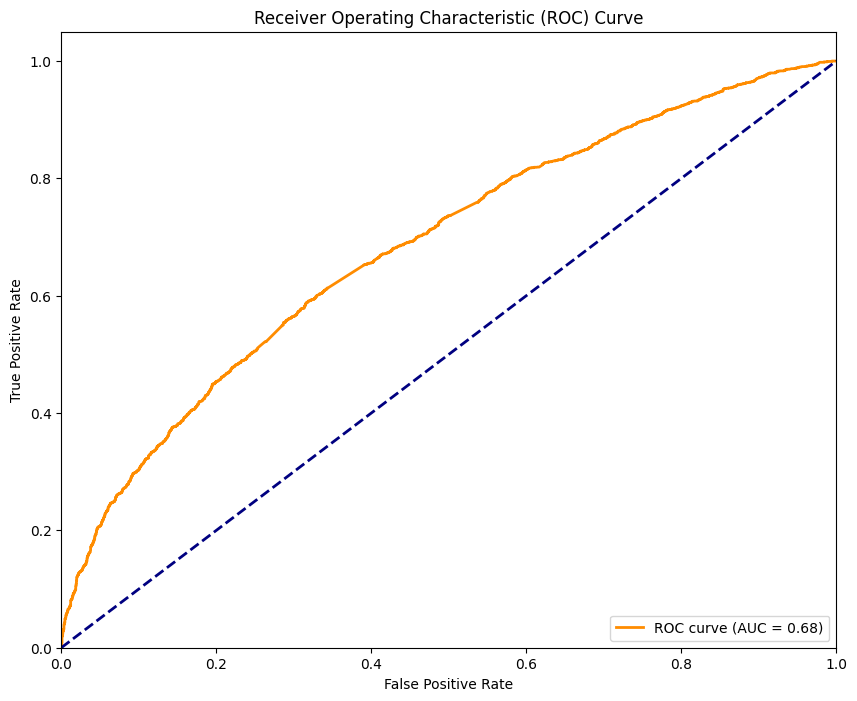

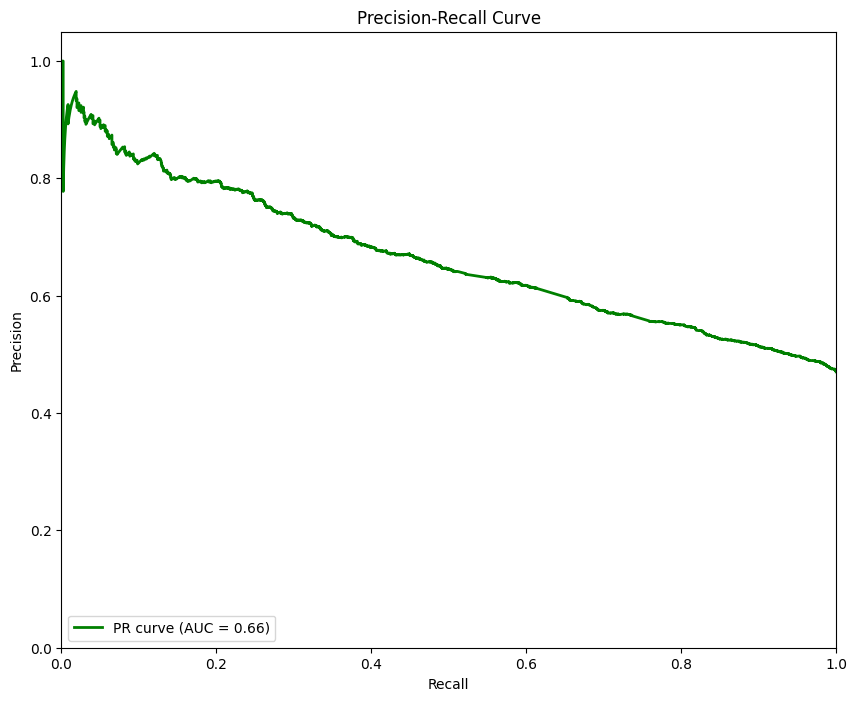

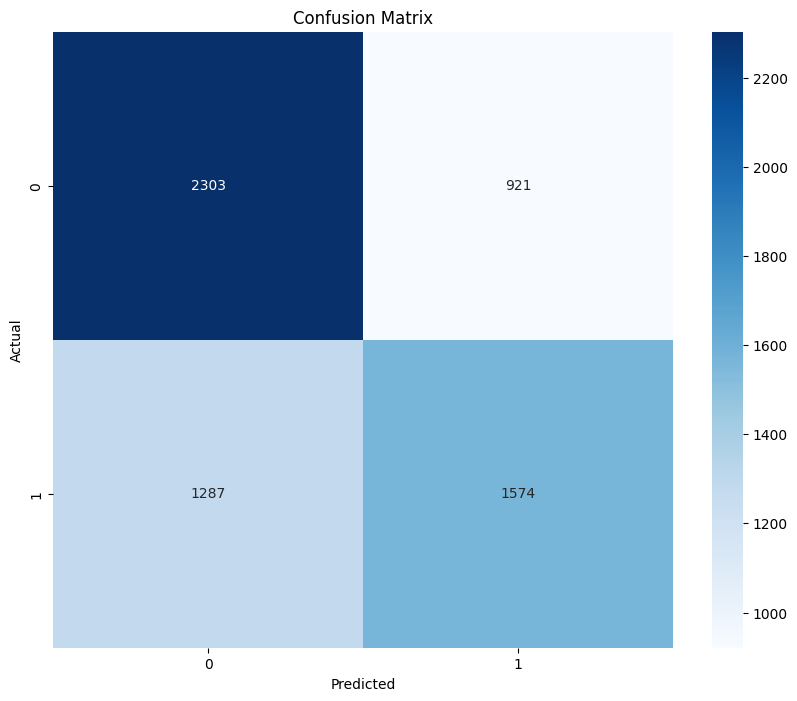

In [ ]:
# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_val, best_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, best_model.predict_proba(X_val)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# del df_selected_features_syntactic, df_4grams_syntactic, X_train, X_val, y_train, y_val, random_search_xg, xgb_classifier, best_model, y_val_pred, y_val_pred_proba, fpr, tpr, thresholds, cm
# gc.collect()

# print("done")

In [ ]:
!pip install pipdeptree
!pipdeptree

Streaming output truncated to the last 5000 lines.
│   └── scipy [required: >=0.13.2,!=1.12.0, installed: 1.13.1]
│       └── numpy [required: >=1.22.4,<2.3, installed: 1.26.4]
├── scipy [required: >=1.1.0, installed: 1.13.1]
│   └── numpy [required: >=1.22.4,<2.3, installed: 1.26.4]
└── scs [required: >=3.2.4.post1, installed: 3.2.6]
    ├── numpy [required: Any, installed: 1.26.4]
    └── scipy [required: Any, installed: 1.13.1]
        └── numpy [required: >=1.22.4,<2.3, installed: 1.26.4]
datascience==0.17.6
├── branca [required: Any, installed: 0.7.2]
│   └── Jinja2 [required: >=3, installed: 3.1.4]
│       └── MarkupSafe [required: >=2.0, installed: 2.1.5]
├── folium [required: >=0.9.1, installed: 0.17.0]
│   ├── branca [required: >=0.6.0, installed: 0.7.2]
│   │   └── Jinja2 [required: >=3, installed: 3.1.4]
│   │       └── MarkupSafe [required: >=2.0, installed: 2.1.5]
│   ├── Jinja2 [required: >=2.9, installed: 3.1.4]
│   │   └── MarkupSafe [required: >=2.0, installed: 2.1.5]


In [ ]:
import sys

for name, module in sys.modules.items():
    if hasattr(module, '__file__') and module.__file__:
        print(name)

_frozen_importlib
_frozen_importlib_external
codecs
encodings.aliases
encodings
encodings.utf_8
abc
io
types
enum
sre_constants
sre_parse
sre_compile
_collections_abc
keyword
operator
reprlib
collections
functools
copyreg
re
warnings
stat
genericpath
posixpath
os.path
os
_sitebuiltins
_distutils_hack
importlib._bootstrap
importlib._bootstrap_external
importlib
importlib._abc
contextlib
importlib.util
importlib.machinery
google
sitecustomize
site
runpy
ipykernel._version
_json
json.scanner
json.decoder
json.encoder
json
signal
_weakrefset
threading
collections.abc
selectors
subprocess
IPython.core
IPython.core.getipython
IPython.core.release
weakref
copy
fnmatch
glob
token
tokenize
linecache
traceback
string
logging
_compression
_bz2
bz2
_lzma
lzma
shutil
ast
_opcode
opcode
dis
inspect
typing
traitlets.utils
traitlets.utils.bunch
traitlets.utils.descriptions
traitlets.utils.getargspec
traitlets.utils.importstring
traitlets.utils.sentinel
traitlets.traitlets
traitlets._version
traitlets.

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohappyeyeballs                 2.4.0
aiohttp                          3.10.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.13
albumentations                   1.4.14
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.2
astropy-iers-data                0.2024.8.19.0.32.16
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.2.0
audioread              

In [ ]:
!pip freeze
!pip freeze > requirements.txt

absl-py==1.4.0
accelerate==0.32.1
aiohappyeyeballs==2.4.0
aiohttp==3.10.5
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.13
albumentations==1.4.14
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.18.0
asn1crypto==1.5.1
astropy==6.1.2
astropy-iers-data==0.2024.8.19.0.32.16
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.6.2
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.15.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.7.4
cffi==1.17.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
clarabel==0.9.0
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.18.1
cloudpickle==2.2.1
cmake==3.30.2
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confe